In [373]:
#standard packages
import numpy as np
import pandas as pd
from datetime import date, datetime

#for charting
from matplotlib import pyplot as plt
import seaborn as sns

#for analysis
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from scipy.stats import f_oneway
from scipy import stats
import statsmodels.api as sm
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [374]:
#load final data
df = pd.read_csv('..//data//genshin_data.csv')

In [375]:
#check sample size
print("sample size:", len(df))

sample size: 1203


In [376]:
#check for missing values
df.columns[df.isnull().any()].tolist()

['nickname']

In [377]:
#check for a balance sample across the three servers
df.server.value_counts()

os_asia    451
os_usa     389
os_euro    363
Name: server, dtype: int64

<b>Data Processing</b><br>

In [378]:
#rename server name
df['server'] = df['server'].replace({'os_asia': 'asia', 'os_usa': 'usa', 'os_euro': 'euro'})

In [379]:
#Culi is a combined score for Anemoculi, Geoculi, Dendroculi and Electroculi
df['culi'] = df.anemoculi + df.geoculi + df.dendroculi + df.electroculi

In [380]:
#a composite score on the various realms available in the teapot
df['teapot_realm'] = df.floating_abode + df.emerald_peak + df.cool_isle + df.silken_courtyard + df.sublime_spicewood

In [381]:
#a composite score for total exploration in the game
df['total_explored'] = df.mondstadt_explored + df.liyue_explored + df.inazuma_explored + df.enkanomiya_explored + df.the_chasm_explored + df.underground_mines_explored + df.sumeru_explored

In [382]:
#process Spiral Abyss Levels to a score
def abyss_code(txt):
    
    if txt == '-':
        return [0, 0]
    else:
        text_list = txt.split("-")
        floor = int(text_list[0])
        if text_list[1] == 'Jan':
            chamber = 1
        elif text_list[1] == 'Feb':
            chamber = 2
        elif text_list[1] == 'Mar':
            chamber = 3
        else:
            chamber = text_list[1]
        
        score1 = (int(floor)-1)*3 + int(chamber)
        if floor < 8:
            score2 = 0
        elif floor >= 8:
            score2 = (int(floor)-9)*3 + int(chamber)

    return [score1,score2]

In [383]:
df[['abyss_score1', 'abyss_score2']] = df.spiral_abyss.apply(lambda x: pd.Series([abyss_code(x)[0],abyss_code(x)[1]]))

In [384]:
#for curve fitting
df['days_active^2'] = df['days_active'] * df['days_active']
df['1/days_active'] = 1 / df['days_active'] 
df['log(days_active)'] = np.log(df['days_active'])
df['sigmoid(days_active)'] = 1 / (1 + np.exp(-1 * np.log(df['days_active'])))

In [385]:
#calculate number of 5 star limited time banner 5-star characters
df['ban5_characters'] = df.albedo + df.alhaitham + df.arataki_itto + df.cyno + df.eula + df.ganyu + df.hutao + df.kaedehara_kazuha + df.kamisato_ayaka + df.kamisato_ayato + df.klee + df.nahida + df.nilou + df.raiden_shogun + df.sangonomiya_kokomi + df.shenhe + df.tartaglia + df.venti + df.wanderer + df.xiao + df.yae_miko + df.yelan + df.yoimiya + df.zhongli

In [386]:
#calculate number of constellations among limited time banner 5-star characters
df['ban5_constellation'] = df.albedo_constellation + df.alhaitham_constellation + df.arataki_itto_constellation + df.cyno_constellation + df.eula_constellation + df.ganyu_constellation + df.hutao_constellation + df.kaedehara_kazuha_constellation + df.kamisato_ayaka_constellation + df.kamisato_ayato_constellation + df.klee_constellation + df.nahida_constellation + df.nilou_constellation + df.raiden_shogun_constellation + df.sangonomiya_kokomi_constellation + df.shenhe_constellation + df.tartaglia_constellation + df.venti_constellation + df.wanderer_constellation + df.xiao_constellation + df.yae_miko_constellation + df.yelan_constellation + df.yoimiya_constellation + df.zhongli_constellation

In [387]:
#calculate number of 5 star standard banner 5-star characters
df['stand5_characters'] =df.jean + df.qiqi +df.mona + df.keqing + df.diluc + df.tighnari

In [388]:
#calculate number of constellations among standard banner 5-star characters
df['stand5_constellation'] =df.jean_constellation + df.qiqi_constellation +df.mona_constellation + df.keqing_constellation + df.diluc_constellation + df.tighnari_constellation

In [389]:
#calculate number of 5-star characters
df['total_5_characters'] = df.ban5_characters + df.stand5_characters

In [390]:
#calculate number of constellations among 5-star characters
df['total_5_constellation'] = df.ban5_constellation + df.stand5_constellation

In [391]:
#calculate number of 5-star weapons
temp_list = []

for n in df.index:
    count = 0
    if df.albedo_weapon_rarity[n] == 5:
        count += 1
    if df.albedo_weapon_rarity[n] == 5:
        count += 1
    if df.alhaitham_weapon_rarity[n] == 5:
        count += 1
    if df.aloy_weapon_rarity[n] == 5:
        count += 1        
    if df.amber_weapon_rarity[n] == 5:
        count += 1        
    if df.arataki_itto_weapon_rarity[n] == 5:
        count += 1        
    if df.barbara_weapon_rarity[n] == 5:
        count += 1        
    if df.beidou_weapon_rarity[n] == 5:
        count += 1        
    if df.bennett_weapon_rarity[n] == 5:
        count += 1        
    if df.candace_weapon_rarity[n] == 5:
        count += 1        
    if df.chongyun_weapon_rarity[n] == 5:
        count += 1        
    if df.collei_weapon_rarity[n] == 5:
        count += 1        
    if df.cyno_weapon_rarity[n] == 5:
        count += 1        
    if df.diluc_weapon_rarity[n] == 5:
        count += 1        
    if df.diona_weapon_rarity[n] == 5:
        count += 1      
    if df.dori_weapon_rarity[n] == 5:
        count += 1  
    if df.eula_weapon_rarity[n] == 5:
        count += 1  
    if df.faruzan_weapon_rarity[n] == 5:
        count += 1  
    if df.fischl_weapon_rarity[n] == 5:
        count += 1  
    if df.ganyu_weapon_rarity[n] == 5:
        count += 1  
    if df.gorou_weapon_rarity[n] == 5:
        count += 1  
    if df.hutao_weapon_rarity[n] == 5:
        count += 1  
    if df.jean_weapon_rarity[n] == 5:
        count += 1  
    if df.kaedehara_kazuha_weapon_rarity[n] == 5:
        count += 1  
    if df.kaeya_weapon_rarity[n] == 5:
        count += 1  
    if df.kamisato_ayaka_weapon_rarity[n] == 5:
        count += 1  
    if df.kamisato_ayato_weapon_rarity[n] == 5:
        count += 1  
    if df.keqing_weapon_rarity[n] == 5:
        count += 1  
    if df.klee_weapon_rarity[n] == 5:
        count += 1  
    if df.kujou_sara_weapon_rarity[n] == 5:
        count += 1  
    if df.kuki_shinobu_weapon_rarity[n] == 5:
        count += 1  
    if df.layla_weapon_rarity[n] == 5:
        count += 1  
    if df.lisa_weapon_rarity[n] == 5:
        count += 1  
    if df.mona_weapon_rarity[n] == 5:
        count += 1  
    if df.nahida_weapon_rarity[n] == 5:
        count += 1  
    if df.nilou_weapon_rarity[n] == 5:
        count += 1  
    if df.ningguang_weapon_rarity[n] == 5:
        count += 1  
    if df.noelle_weapon_rarity[n] == 5:
        count += 1  
    if df.qiqi_weapon_rarity[n] == 5:
        count += 1  
    if df.raiden_shogun_weapon_rarity[n] == 5:
        count += 1  
    if df.razor_weapon_rarity[n] == 5:
        count += 1  
    if df.rosaria_weapon_rarity[n] == 5:
        count += 1  
    if df.sangonomiya_kokomi_weapon_rarity[n] == 5:
        count += 1  
    if df.sayu_weapon_rarity[n] == 5:
        count += 1  
    if df.shenhe_weapon_rarity[n] == 5:
        count += 1  
    if df.shikanoin_heizou_weapon_rarity[n] == 5:
        count += 1  
    if df.sucrose_weapon_rarity[n] == 5:
        count += 1  
    if df.tartaglia_weapon_rarity[n] == 5:
        count += 1  
    if df.thoma_weapon_rarity[n] == 5:
        count += 1  
    if df.tighnari_weapon_rarity[n] == 5:
        count += 1  
    if df.traveler_aether_weapon_rarity[n] == 5:
        count += 1  
    if df.traveler_lumine_weapon_rarity[n] == 5:
        count += 1  
    if df.venti_weapon_rarity[n] == 5:
        count += 1  
    if df.wanderer_weapon_rarity[n] == 5:
        count += 1  
    if df.xiangling_weapon_rarity[n] == 5:
        count += 1  
    if df.xiao_weapon_rarity[n] == 5:
        count += 1  
    if df.xingqiu_weapon_rarity[n] == 5:
        count += 1  
    if df.xinyan_weapon_rarity[n] == 5:
        count += 1  
    if df.yae_miko_weapon_rarity[n] == 5:
        count += 1  
    if df.yanfei_weapon_rarity[n] == 5:
        count += 1  
    if df.yaoyao_weapon_rarity[n] == 5:
        count += 1  
    if df.yelan_weapon_rarity[n] == 5:
        count += 1  
    if df.yoimiya_weapon_rarity[n] == 5:
        count += 1  
    if df.yun_jin_weapon_rarity[n] == 5:
        count += 1      
    if df.zhongli_weapon_rarity[n] == 5:
        count += 1  
    n += 1
    temp_list.append(count)
    
df['total_5_weapon'] = temp_list

In [392]:
#calculate number of refinements among 5-star weapons
temp_list = []

for n in df.index:
    count = 0
    if df.albedo_weapon_rarity[n] == 5:
        count += df.albedo_weapon_refinement[n]
    if df.alhaitham_weapon_rarity[n] == 5:
        count += df.alhaitham_weapon_refinement[n]
    if df.aloy_weapon_rarity[n] == 5:
        count += df.aloy_weapon_refinement[n]
    if df.amber_weapon_rarity[n] == 5:
        count += df.amber_weapon_refinement[n]
    if df.arataki_itto_weapon_rarity[n] == 5:
        count += df.arataki_itto_weapon_refinement[n]
    if df.barbara_weapon_rarity[n] == 5:
        count += df.barbara_weapon_refinement[n]
    if df.beidou_weapon_rarity[n] == 5:
        count += df.beidou_weapon_refinement[n]
    if df.bennett_weapon_rarity[n] == 5:
        count += df.bennett_weapon_refinement[n]
    if df.candace_weapon_rarity[n] == 5:
        count += df.candace_weapon_refinement[n]
    if df.chongyun_weapon_rarity[n] == 5:
        count += df.chongyun_weapon_refinement[n]
    if df.collei_weapon_rarity[n] == 5:
        count += df.collei_weapon_refinement[n]
    if df.cyno_weapon_rarity[n] == 5:
        count += df.cyno_weapon_refinement[n]
    if df.diluc_weapon_rarity[n] == 5:
        count += df.diluc_weapon_refinement[n]
    if df.diona_weapon_rarity[n] == 5:
        count += df.diona_weapon_refinement[n]
    if df.dori_weapon_rarity[n] == 5:
        count += df.dori_weapon_refinement[n]
    if df.eula_weapon_rarity[n] == 5:
        count += df.eula_weapon_refinement[n]
    if df.faruzan_weapon_rarity[n] == 5:
        count += df.faruzan_weapon_refinement[n]
    if df.fischl_weapon_rarity[n] == 5:
        count += df.fischl_weapon_refinement[n]
    if df.ganyu_weapon_rarity[n] == 5:
        count += df.ganyu_weapon_refinement[n]
    if df.gorou_weapon_rarity[n] == 5:
        count += df.gorou_weapon_refinement[n]
    if df.hutao_weapon_rarity[n] == 5:
        count += df.hutao_weapon_refinement[n]
    if df.jean_weapon_rarity[n] == 5:
        count += df.jean_weapon_refinement[n]
    if df.kaedehara_kazuha_weapon_rarity[n] == 5:
        count += df.kaedehara_kazuha_weapon_refinement[n]
    if df.kaeya_weapon_rarity[n] == 5:
        count += df.kaeya_weapon_refinement[n]
    if df.kamisato_ayaka_weapon_rarity[n] == 5:
        count += df.kamisato_ayaka_weapon_refinement[n]
    if df.kamisato_ayato_weapon_rarity[n] == 5:
        count += df.kamisato_ayato_weapon_refinement[n]
    if df.keqing_weapon_rarity[n] == 5:
        count += df.keqing_weapon_refinement[n]
    if df.klee_weapon_rarity[n] == 5:
        count += df.klee_weapon_refinement[n]
    if df.kujou_sara_weapon_rarity[n] == 5:
        count += df.kujou_sara_weapon_refinement[n]
    if df.kuki_shinobu_weapon_rarity[n] == 5:
        count += df.kuki_shinobu_weapon_refinement[n]
    if df.layla_weapon_rarity[n] == 5:
        count += df.layla_weapon_refinement[n]
    if df.lisa_weapon_rarity[n] == 5:
        count += df.lisa_weapon_refinement[n]
    if df.mona_weapon_rarity[n] == 5:
        count += df.mona_weapon_refinement[n]
    if df.nahida_weapon_rarity[n] == 5:
        count += df.nahida_weapon_refinement[n]
    if df.nilou_weapon_rarity[n] == 5:
        count += df.nilou_weapon_refinement[n]
    if df.ningguang_weapon_rarity[n] == 5:
        count += df.ningguang_weapon_refinement[n]
    if df.noelle_weapon_rarity[n] == 5:
        count += df.noelle_weapon_refinement[n]
    if df.qiqi_weapon_rarity[n] == 5:
        count += df.qiqi_weapon_refinement[n]
    if df.raiden_shogun_weapon_rarity[n] == 5:
        count += df.raiden_shogun_weapon_refinement[n]
    if df.razor_weapon_rarity[n] == 5:
        count += df.razor_weapon_refinement[n]
    if df.rosaria_weapon_rarity[n] == 5:
        count += df.rosaria_weapon_refinement[n]
    if df.sangonomiya_kokomi_weapon_rarity[n] == 5:
        count += df.sangonomiya_kokomi_weapon_refinement[n]
    if df.sayu_weapon_rarity[n] == 5:
        count += df.sayu_weapon_refinement[n]
    if df.shenhe_weapon_rarity[n] == 5:
        count += df.shenhe_weapon_refinement[n]
    if df.shikanoin_heizou_weapon_rarity[n] == 5:
        count += df.shikanoin_heizou_weapon_refinement[n]
    if df.sucrose_weapon_rarity[n] == 5:
        count += df.sucrose_weapon_refinement[n]
    if df.tartaglia_weapon_rarity[n] == 5:
        count += df.tartaglia_weapon_refinement[n]
    if df.thoma_weapon_rarity[n] == 5:
        count += df.thoma_weapon_refinement[n]
    if df.tighnari_weapon_rarity[n] == 5:
        count += df.tighnari_weapon_refinement[n]
    if df.traveler_aether_weapon_rarity[n] == 5:
        count += df.traveler_aether_weapon_refinement[n]
    if df.traveler_lumine_weapon_rarity[n] == 5:
        count += df.traveler_lumine_weapon_refinement[n]
    if df.venti_weapon_rarity[n] == 5:
        count += df.venti_weapon_refinement[n]
    if df.wanderer_weapon_rarity[n] == 5:
        count += df.wanderer_weapon_refinement[n]
    if df.xiangling_weapon_rarity[n] == 5:
        count += df.xiangling_weapon_refinement[n]
    if df.xiao_weapon_rarity[n] == 5:
        count += df.xiao_weapon_refinement[n]
    if df.xingqiu_weapon_rarity[n] == 5:
        count += df.xingqiu_weapon_refinement[n]
    if df.xinyan_weapon_rarity[n] == 5:
        count += df.xinyan_weapon_refinement[n]
    if df.yae_miko_weapon_rarity[n] == 5:
        count += df.yae_miko_weapon_refinement[n]
    if df.yanfei_weapon_rarity[n] == 5:
        count += df.yanfei_weapon_refinement[n]
    if df.yaoyao_weapon_rarity[n] == 5:
        count += df.yaoyao_weapon_refinement[n]
    if df.yelan_weapon_rarity[n] == 5:
        count += df.yelan_weapon_refinement[n]
    if df.yoimiya_weapon_rarity[n] == 5:
        count += df.yoimiya_weapon_refinement[n]
    if df.yun_jin_weapon_rarity[n] == 5: 
        count += df.yun_jin_weapon_refinement[n]
    if df.zhongli_weapon_rarity[n] == 5:
        count += df.zhongli_weapon_refinement[n]
        
    n += 1
    temp_list.append(count)
    
df['total_5_refinement'] = temp_list

<b>Days Active</b><br>
No. of days playing Genshin Impact since launched

In [393]:
#Genshin Impact was launched in 28 September 2020
from datetime import date, datetime
max_days_active = date.today() - datetime.strptime('09-28-2020', '%m-%d-%Y').date()
print('Max Number of Days Active: ', max_days_active.days +1)

Max Number of Days Active:  887


In [394]:
df.days_active.describe()

count    1203.000000
mean      404.566916
std       256.716174
min        20.000000
25%       173.000000
50%       376.000000
75%       607.000000
max       860.000000
Name: days_active, dtype: float64

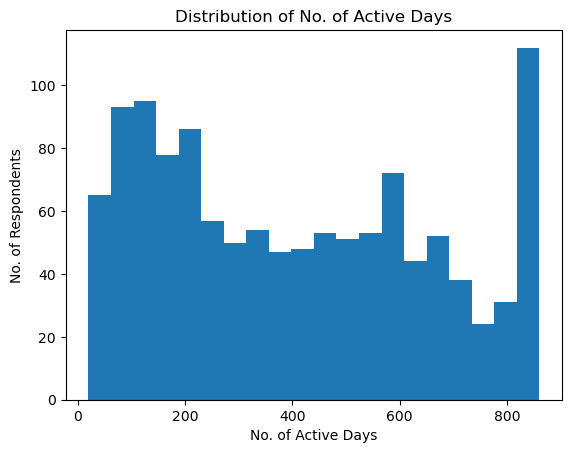

In [562]:
plt.hist(df.days_active, bins=20)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Active Days")

plt.show()

In [396]:
asia_list = df[df['server'] == 'asia'].days_active.tolist()
euro_list = df[df['server'] == 'euro'].days_active.tolist()
usa_list = df[df['server'] == 'usa'].days_active.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')       

asia range: 21 - 860 mean: 417.0110864745011
euro range: 22 - 860 mean: 413.4848484848485
usa  range: 20 - 860 mean: 381.81748071979433
0.10260862601242378 no significant difference between server


<b>Level</b></br>
Adventure rank of the player<br>
Max is 60.

In [397]:
df.level.describe()

count    1203.000000
mean       54.734830
std         6.714056
min         0.000000
25%        54.000000
50%        57.000000
75%        59.000000
max        60.000000
Name: level, dtype: float64

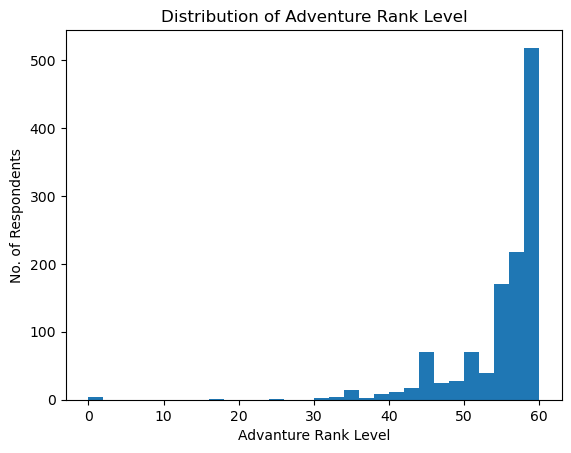

In [563]:
plt.hist(df.level, bins=30)
plt.xlabel("Advanture Rank Level")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Adventure Rank Level")
plt.show()

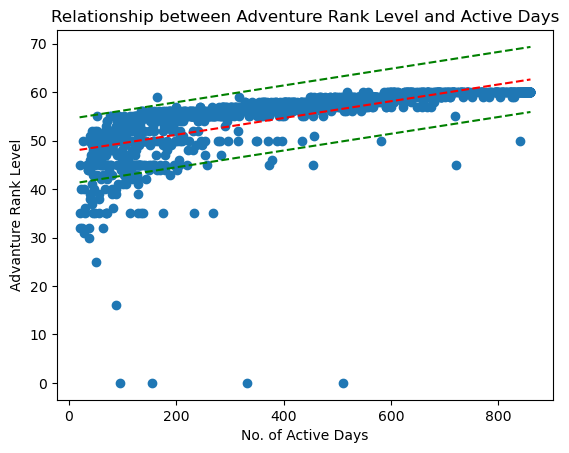

In [399]:
df = df.sort_values(by=['days_active'])
x = df.days_active.tolist()
y = df.level.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Advanture Rank Level")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.level.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.level.tolist()),"g--")
plt.title("Relationship between Adventure Rank Level and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  level   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     679.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          4.21e-198
Time:                        20:00:11   Log-Likelihood:                -3541.6
No. Observations:                1203   AIC:                             7089.
Df Residuals:                    1200   BIC:                             7105.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               17.8753      1.941  

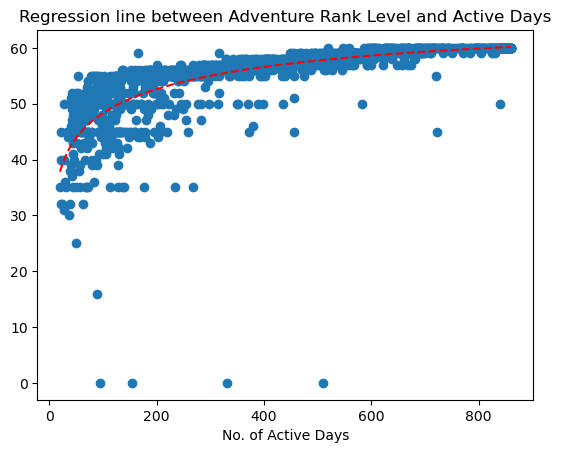

In [400]:
#max model: df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
df = df.sort_values(by=['days_active'])
y_sm = df.level
x_sm = df[['days_active','log(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Adventure Rank Level and Active Days")
plt.xlabel("No. of Active Days")
plt.show()

In [401]:
asia_list = df[df['server'] == 'asia'].level.tolist()
euro_list = df[df['server'] == 'euro'].level.tolist()
usa_list = df[df['server'] == 'usa'].level.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')  

asia range: 32 - 60 mean: 55.04212860310421
euro range: 0 - 60 mean: 54.92011019283746
usa  range: 0 - 60 mean: 54.20565552699229
0.16225990909571927 no significant difference between server


<b>Achievements</b></br>
No. of game achievements (i.e. required to complete certain activity in game)<br>
Max is 890.

In [402]:
df.achievements.describe()

count    1203.000000
mean      542.795511
std       217.425321
min        78.000000
25%       351.500000
50%       551.000000
75%       734.500000
max       875.000000
Name: achievements, dtype: float64

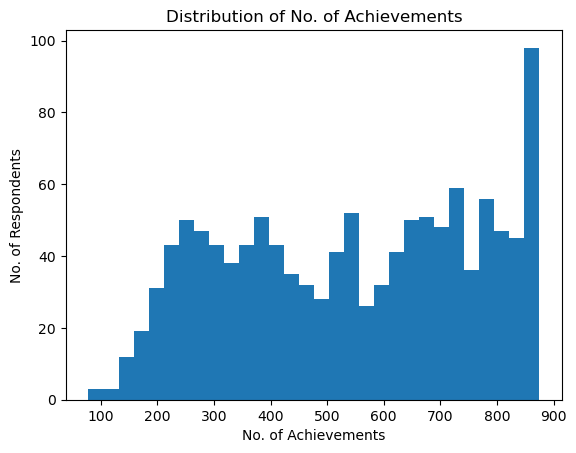

In [564]:
plt.hist(df.achievements, bins=30)
plt.xlabel("No. of Achievements")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Achievements")
plt.show()

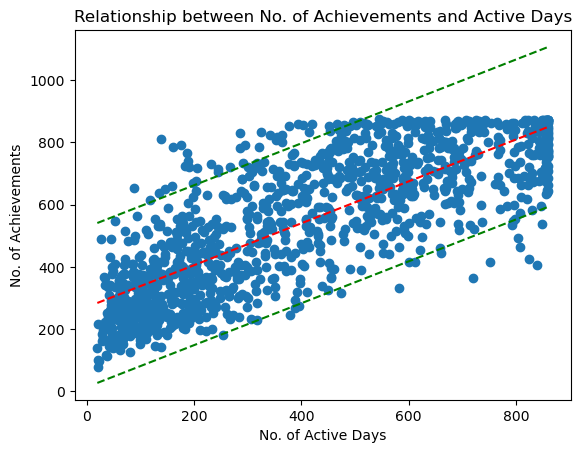

In [404]:
x = df.days_active.tolist()
y = df.achievements.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Achievements")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.days_active.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.days_active.tolist()),"g--")
plt.title("Relationship between No. of Achievements and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:           achievements   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1091.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.09e-270
Time:                        20:00:11   Log-Likelihood:                -7557.7
No. Observations:                1203   AIC:                         1.512e+04
Df Residuals:                    1200   BIC:                         1.514e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -397.5473     39.864  

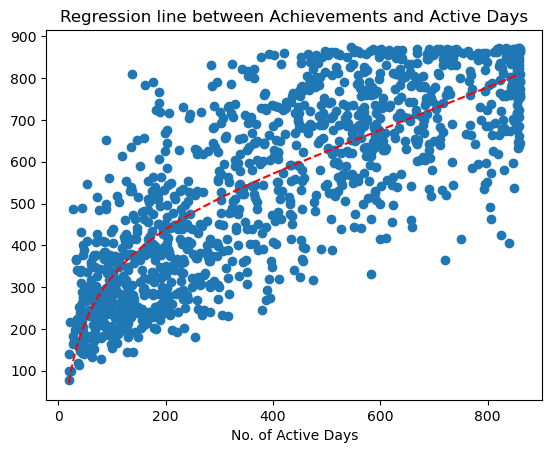

In [405]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.achievements
x_sm = df[['days_active^2','log(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Achievements and Active Days")
plt.xlabel("No. of Active Days")
plt.show()

In [406]:
asia_list = df[df['server'] == 'asia'].achievements.tolist()
euro_list = df[df['server'] == 'euro'].achievements.tolist()
usa_list = df[df['server'] == 'usa'].achievements.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')  

asia range: 100 - 872 mean: 543.9955654101996
euro range: 113 - 875 mean: 562.5537190082645
usa  range: 78 - 871 mean: 522.9665809768637
0.043878531328065316 significant difference between server


<b>Characters</b></br>
No. of characters the player has<br>
Max is 63.

In [407]:
df.characters.describe()

count    1203.000000
mean       39.768911
std        10.627945
min         6.000000
25%        32.000000
50%        41.000000
75%        47.000000
max        63.000000
Name: characters, dtype: float64

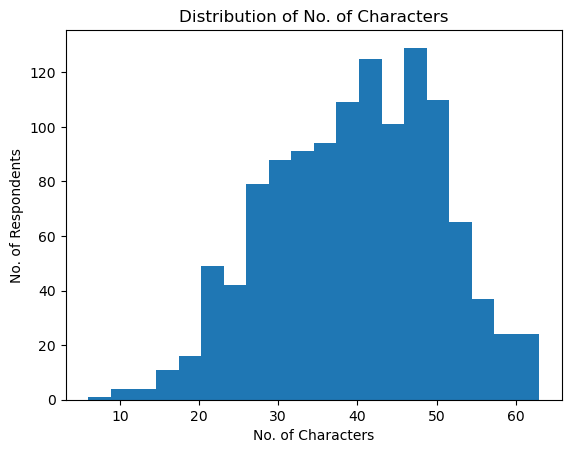

In [565]:
plt.hist(df.characters, bins=20)
plt.xlabel("No. of Characters")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Characters")
plt.show()

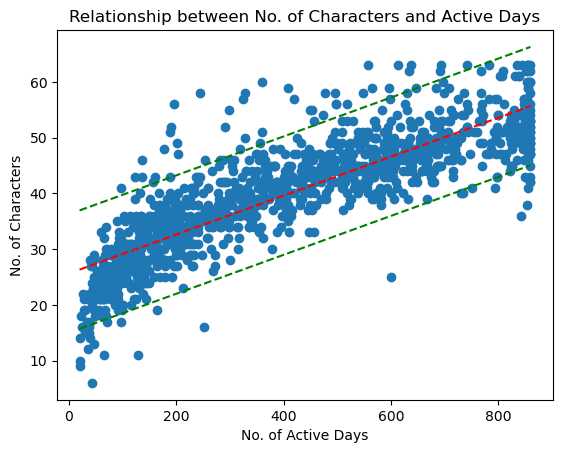

In [409]:
x = df.days_active.tolist()
y = df.characters.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Characters")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.characters.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.characters.tolist()),"g--")
plt.title("Relationship between No. of Characters and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:             characters   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1967.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:00:11   Log-Likelihood:                -3675.5
No. Observations:                1203   AIC:                             7357.
Df Residuals:                    1200   BIC:                             7372.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -15.3776      1.582  

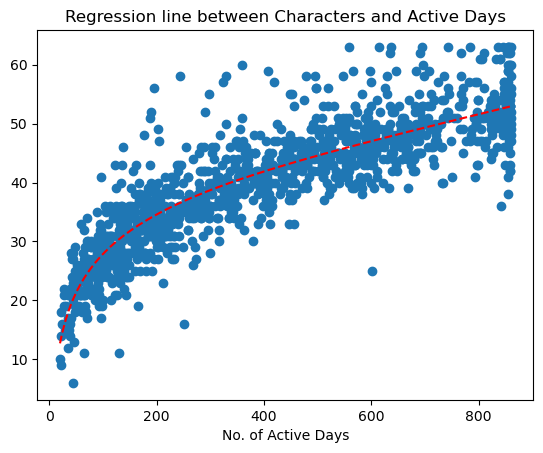

In [410]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.characters
x_sm = df[['days_active^2','log(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Characters and Active Days")
plt.xlabel("No. of Active Days")
plt.show()

In [411]:
asia_list = df[df['server'] == 'asia'].characters.tolist()
euro_list = df[df['server'] == 'euro'].characters.tolist()
usa_list = df[df['server'] == 'usa'].characters.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server') 

asia range: 11 - 63 mean: 39.32150776053215
euro range: 6 - 63 mean: 39.917355371900825
usa  range: 9 - 63 mean: 40.149100257069406
0.5050106102824565 no significant difference between server


<b>Total no. of 5-Star Characters</b></br>
No. of 5-Star characters the player has in his/her showcase<br>
Max is 8.

In [412]:
df.total_5_characters.describe()

count    1203.000000
mean        5.335827
std         2.331568
min         0.000000
25%         3.000000
50%         6.000000
75%         8.000000
max         8.000000
Name: total_5_characters, dtype: float64

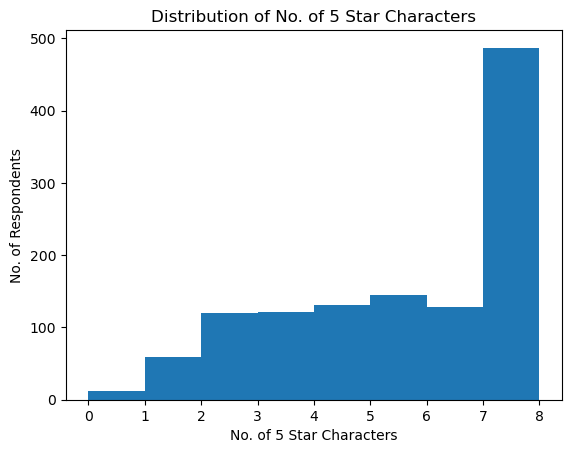

In [566]:
plt.hist(df.total_5_characters, bins=8)
plt.xlabel("No. of 5 Star Characters")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of 5 Star Characters")
plt.show()

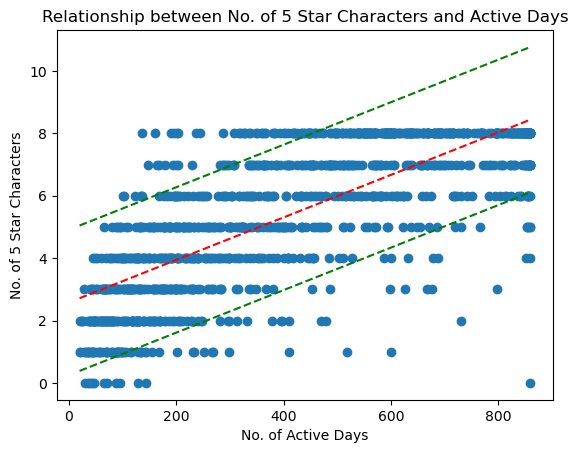

In [414]:
x = df.days_active.tolist()
y = df.total_5_characters.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of 5 Star Characters")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_5_characters.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_5_characters.tolist()),"g--")
plt.title("Relationship between No. of 5 Star Characters and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:     total_5_characters   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1017.
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          5.22e-259
Time:                        20:00:11   Log-Likelihood:                -2128.7
No. Observations:                1203   AIC:                             4263.
Df Residuals:                    1200   BIC:                             4279.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2282      0.120     10.216

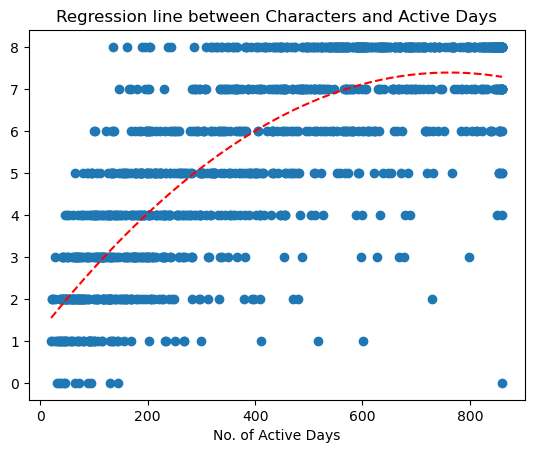

In [415]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_characters
x_sm = df[['days_active','days_active^2']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Characters and Active Days")
plt.xlabel("No. of Active Days")
plt.show()

In [416]:
asia_list = df[df['server'] == 'asia'].total_5_characters.tolist()
euro_list = df[df['server'] == 'euro'].total_5_characters.tolist()
usa_list = df[df['server'] == 'usa'].total_5_characters.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server') 

asia range: 0 - 8 mean: 5.339246119733924
euro range: 0 - 8 mean: 5.3911845730027546
usa  range: 0 - 8 mean: 5.280205655526992
0.8080180603857757 no significant difference between server


<b>Total no. of Constellations among 5-Star Characters</b></br>
No. of Constellations among 5-Star characters the player has in his/her showcase<br>
Max is 48.

In [417]:
df.total_5_constellation.describe()

count    1203.000000
mean        2.762261
std         5.241585
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        48.000000
Name: total_5_constellation, dtype: float64

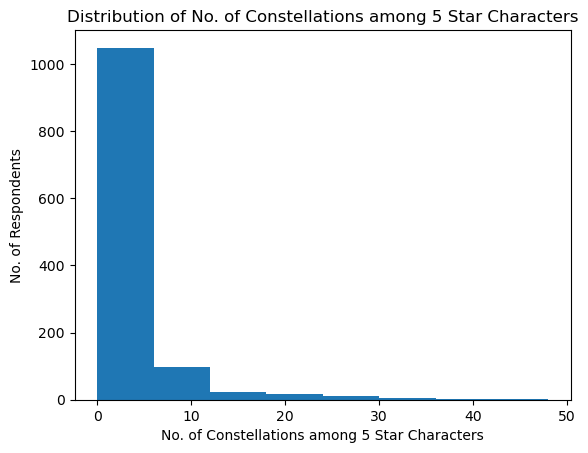

In [567]:
plt.hist(df.total_5_constellation, bins=8)
plt.xlabel("No. of Constellations among 5 Star Characters")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Constellations among 5 Star Characters")
plt.show()

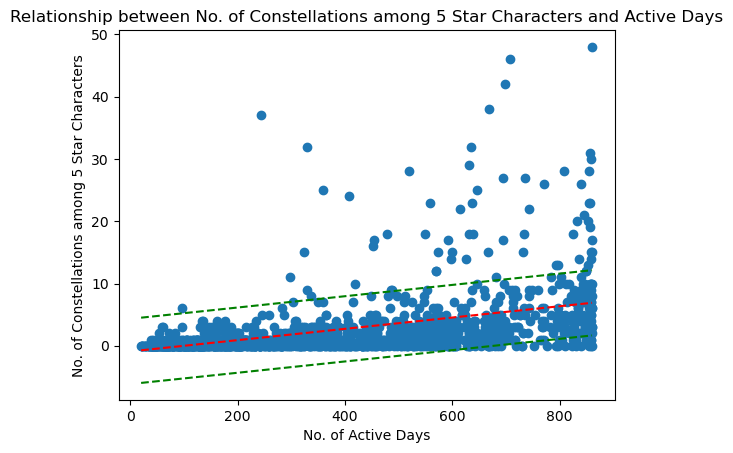

In [419]:
x = df.days_active.tolist()
y = df.total_5_constellation.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of Constellations among 5 Star Characters")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_5_constellation.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_5_constellation.tolist()),"g--")
plt.title("Relationship between No. of Constellations among 5 Star Characters and Active Days")
plt.show()

                              OLS Regression Results                             
Dep. Variable:     total_5_constellation   R-squared:                       0.198
Model:                               OLS   Adj. R-squared:                  0.197
Method:                    Least Squares   F-statistic:                     296.0
Date:                   Fri, 03 Mar 2023   Prob (F-statistic):           1.79e-59
Time:                           20:00:12   Log-Likelihood:                -3566.9
No. Observations:                   1203   AIC:                             7138.
Df Residuals:                       1201   BIC:                             7148.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.91

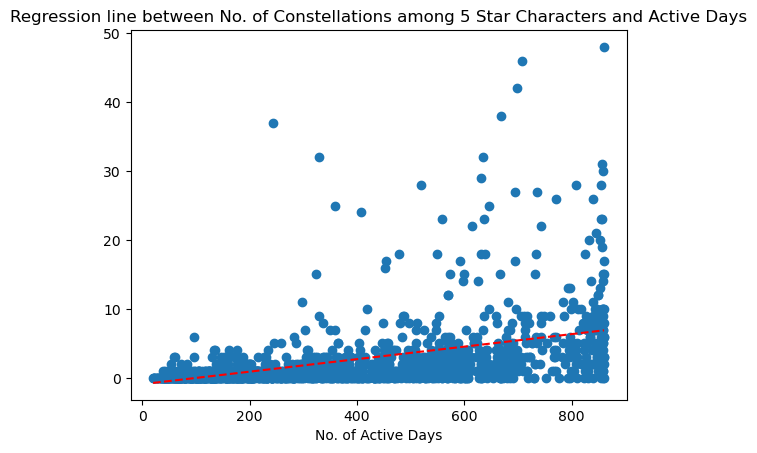

In [420]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_constellation
x_sm = df[['days_active']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between No. of Constellations among 5 Star Characters and Active Days")
plt.xlabel("No. of Active Days")
plt.show()

In [421]:
asia_list = df[df['server'] == 'asia'].total_5_constellation.tolist()
euro_list = df[df['server'] == 'euro'].total_5_constellation.tolist()
usa_list = df[df['server'] == 'usa'].total_5_constellation.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 42 mean: 2.563192904656319
euro range: 0 - 32 mean: 2.1818181818181817
usa  range: 0 - 48 mean: 3.5347043701799485
0.0011113838233427905 significant difference between server


<b>Total no. of 5-Star Weapons</b></br>
No. of 5-Star Weapons the player has in his/her showcase<br>
Max is 8.

In [422]:
df.total_5_weapon.describe()

count    1203.000000
mean        2.113882
std         1.937329
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: total_5_weapon, dtype: float64

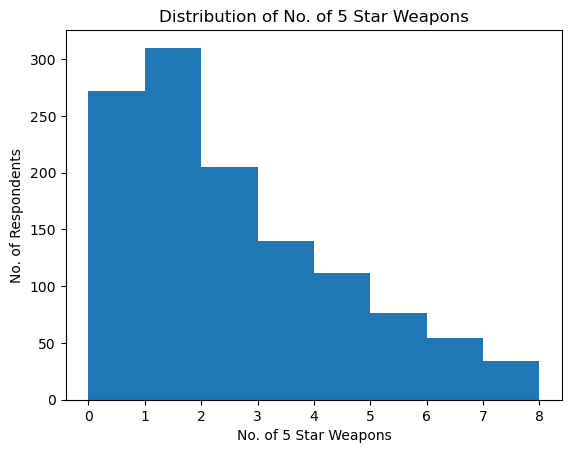

In [568]:
plt.hist(df.total_5_weapon, bins=8)
plt.xlabel("No. of 5 Star Weapons")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of 5 Star Weapons")
plt.show()

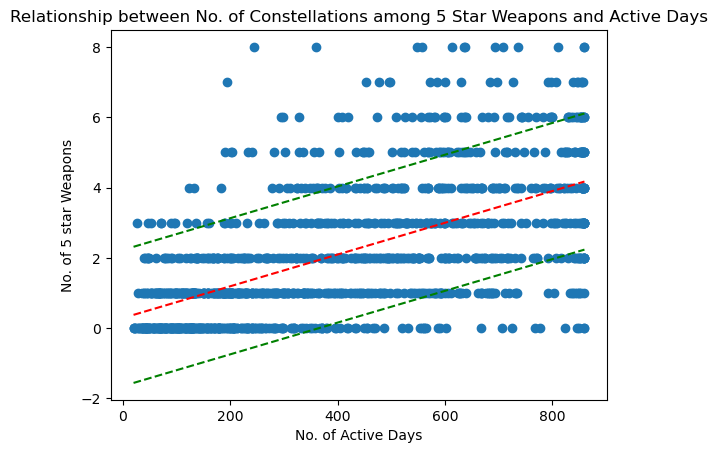

In [424]:
x = df.days_active.tolist()
y = df.total_5_weapon.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("No. of 5 star Weapons")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_5_weapon.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_5_weapon.tolist()),"g--")
plt.title("Relationship between No. of Constellations among 5 Star Weapons and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:         total_5_weapon   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     669.2
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          1.20e-117
Time:                        20:00:12   Log-Likelihood:                -2235.6
No. Observations:                1203   AIC:                             4475.
Df Residuals:                    1201   BIC:                             4485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2876      0.084      3.440      

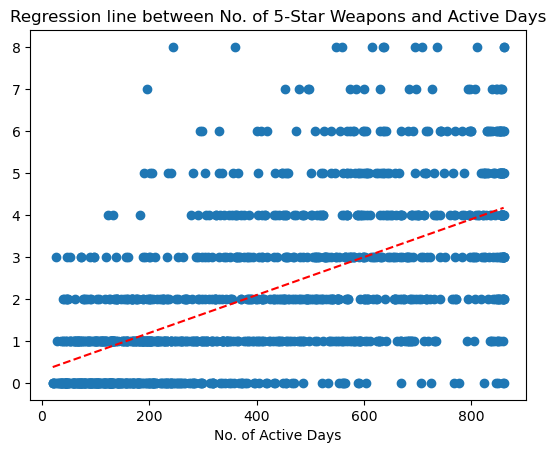

In [425]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_weapon
x_sm = df[['days_active']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between No. of 5-Star Weapons and Active Days")
plt.xlabel("No. of Active Days")
plt.show()

In [426]:
asia_list = df[df['server'] == 'asia'].total_5_weapon.tolist()
euro_list = df[df['server'] == 'euro'].total_5_weapon.tolist()
usa_list = df[df['server'] == 'usa'].total_5_weapon.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 8 mean: 2.1441241685144123
euro range: 0 - 8 mean: 1.9944903581267217
usa  range: 0 - 8 mean: 2.190231362467866
0.3515105848757237 no significant difference between server


<b>Total no. of Refinements among 5-Star Weapons</b></br>
No. of Refinements among 5-Star Weapons the player has in his/her showcase<br>
Max is 40.

In [427]:
df.total_5_refinement.describe()

count    1203.000000
mean        2.486284
std         3.103394
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        37.000000
Name: total_5_refinement, dtype: float64

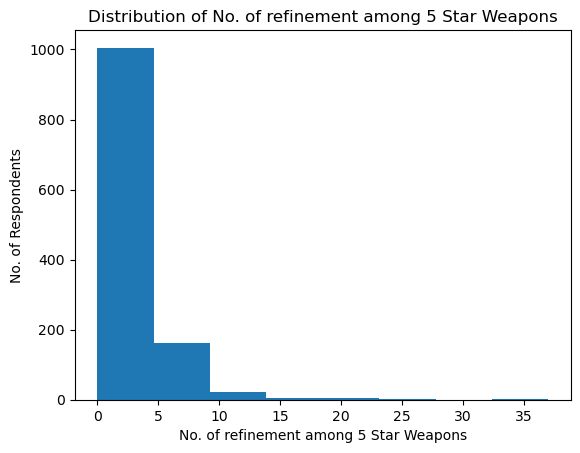

In [569]:
plt.hist(df.total_5_refinement, bins=8)
plt.xlabel("No. of refinement among 5 Star Weapons")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of refinement among 5 Star Weapons")
plt.show()

                            OLS Regression Results                            
Dep. Variable:     total_5_refinement   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     368.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           8.83e-72
Time:                        20:00:12   Log-Likelihood:                -2908.0
No. Observations:                1203   AIC:                             5820.
Df Residuals:                    1201   BIC:                             5830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1174      0.146      0.803      

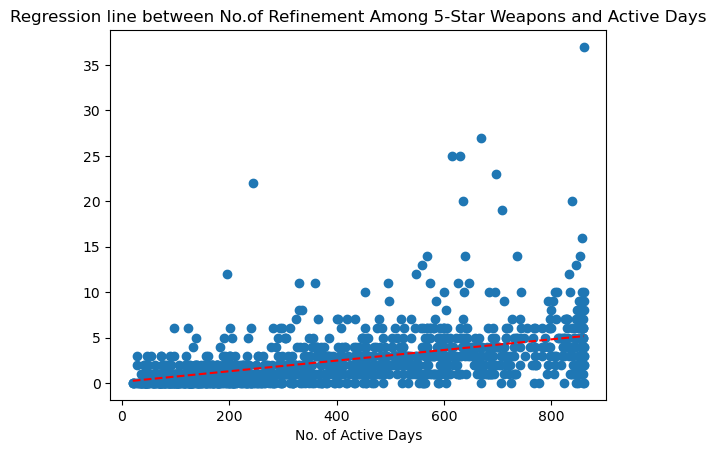

In [429]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_5_refinement
x_sm = df[['days_active']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between No.of Refinement Among 5-Star Weapons and Active Days")
plt.xlabel("No. of Active Days")
plt.show()

In [430]:
asia_list = df[df['server'] == 'asia'].total_5_refinement.tolist()
euro_list = df[df['server'] == 'euro'].total_5_refinement.tolist()
usa_list = df[df['server'] == 'usa'].total_5_refinement.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 27 mean: 2.4789356984478936
euro range: 0 - 20 mean: 2.184573002754821
usa  range: 0 - 37 mean: 2.776349614395887
0.032713636827219214 significant difference between server


<b>Total Exploration</b><br>
Total exploration score on Genshin Map<br>
Max is below 7,000.

In [431]:
df.total_explored.describe()

count    1203.000000
mean     4752.295096
std      1932.991029
min       607.000000
25%      2945.000000
50%      5173.000000
75%      6660.500000
max      6930.000000
Name: total_explored, dtype: float64

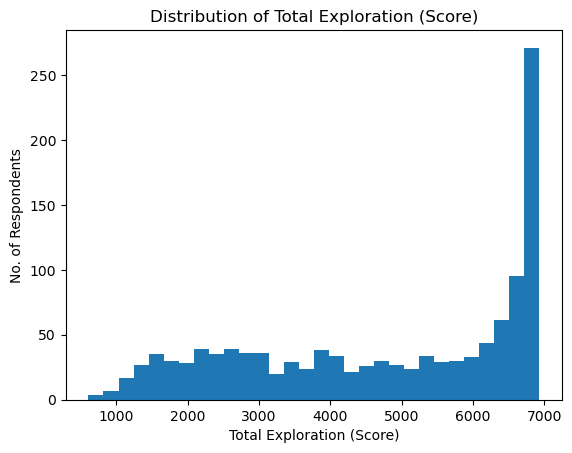

In [570]:
plt.hist(df.total_explored, bins=30)
plt.xlabel("Total Exploration (Score)")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Total Exploration (Score)")
plt.show()

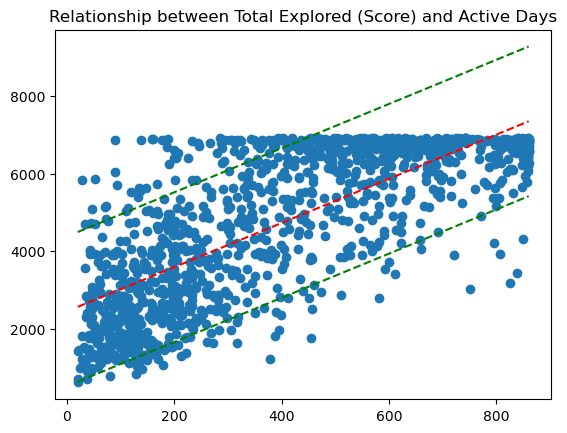

In [433]:
x = df.days_active.tolist()
y = df.total_explored.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.total_explored.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.total_explored.tolist()),"g--")
plt.title("Relationship between Total Explored (Score) and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:         total_explored   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     634.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          4.99e-247
Time:                        20:00:12   Log-Likelihood:                -10237.
No. Observations:                1203   AIC:                         2.048e+04
Df Residuals:                    1199   BIC:                         2.050e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.861e+06 

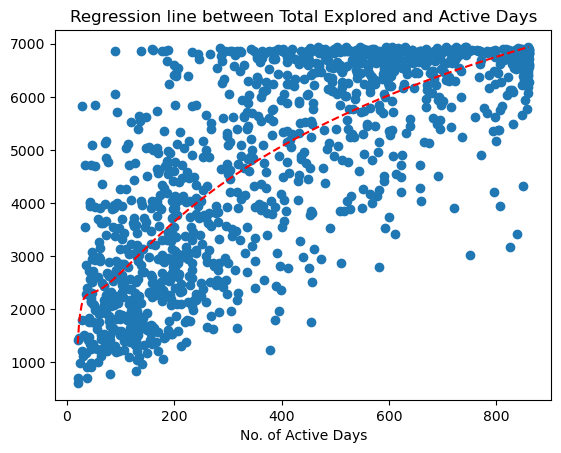

In [434]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.total_explored
x_sm = df[['1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Total Explored and Active Days")
plt.xlabel("No. of Active Days")
plt.show()

In [435]:
asia_list = df[df['server'] == 'asia'].total_explored.tolist()
euro_list = df[df['server'] == 'euro'].total_explored.tolist()
usa_list = df[df['server'] == 'usa'].total_explored.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 698 - 6930 mean: 4709.689578713969
euro range: 701 - 6930 mean: 4950.382920110193
usa  range: 607 - 6930 mean: 4616.843187660668
0.05114637508877799 no significant difference between server


<b>Oculi</b><br>
Total number of Oculi collected in the game.<br>
Max is 613.

In [436]:
df.culi.describe()

count    1203.000000
mean      423.036575
std       170.657865
min        18.000000
25%       278.500000
50%       461.000000
75%       588.000000
max       613.000000
Name: culi, dtype: float64

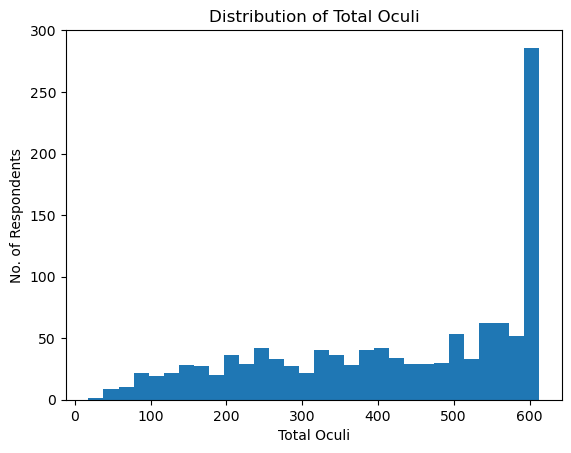

In [571]:
plt.hist(df.culi, bins=30)
plt.xlabel("Total Oculi")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Total Oculi")
plt.show()

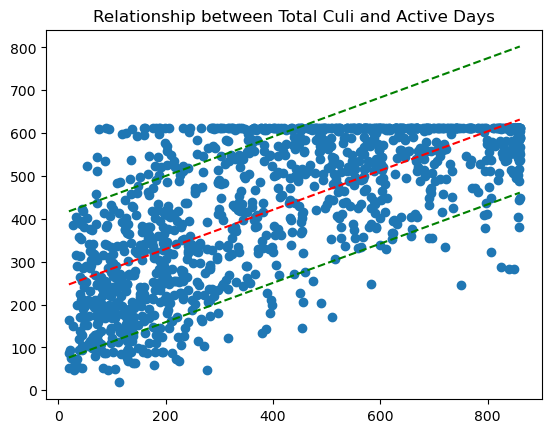

In [438]:
x = df.days_active.tolist()
y = df.culi.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.culi.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.culi.tolist()),"g--")
plt.title("Relationship between Total Culi and Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                   culi   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     628.3
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          2.04e-187
Time:                        20:00:13   Log-Likelihood:                -7458.6
No. Observations:                1203   AIC:                         1.492e+04
Df Residuals:                    1200   BIC:                         1.494e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6862.2656 

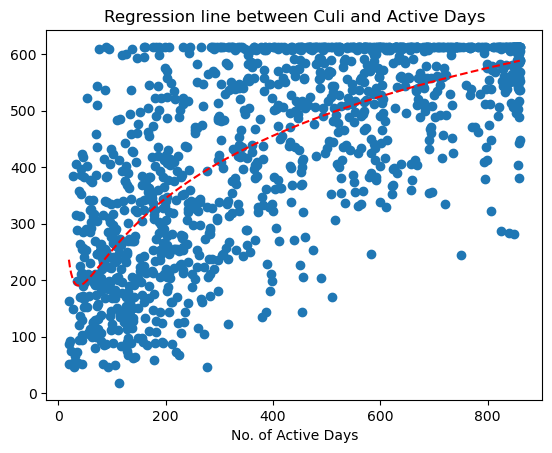

In [439]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.culi
x_sm = df[['log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Culi and Active Days")
plt.xlabel("No. of Active Days")
plt.show()

In [440]:
asia_list = df[df['server'] == 'asia'].culi.tolist()
euro_list = df[df['server'] == 'euro'].culi.tolist()
usa_list = df[df['server'] == 'usa'].culi.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 46 - 613 mean: 419.3392461197339
euro range: 18 - 613 mean: 438.3333333333333
usa  range: 46 - 613 mean: 413.0488431876607
0.10745438917062827 no significant difference between server


<b>Chests, waypoints and domains in open world</b><br>
- Common Chests<br>
- Exquisite Chests<br>
- Precious Chests<br>
- Luxurious Chests<br>
- Remarkable Chests<br>
- Unlocked Waypoints<br>
- Unlocked Domains

In [441]:
df.common_chests.describe()

count    1203.000000
mean     1296.145470
std       758.790635
min        81.000000
25%       544.000000
50%      1291.000000
75%      2031.500000
max      2526.000000
Name: common_chests, dtype: float64

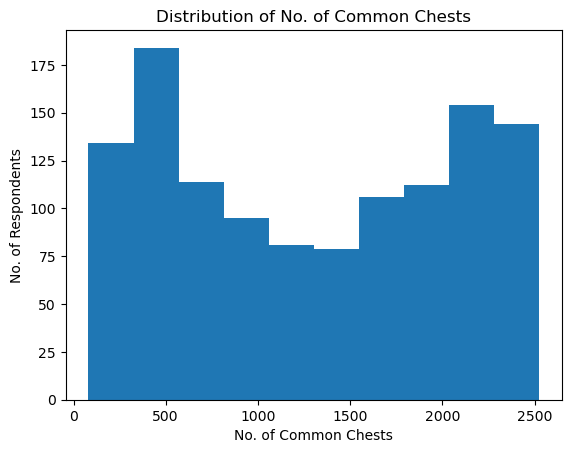

In [574]:
plt.hist(df.common_chests, bins=10)
plt.xlabel("No. of Common Chests")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Common Chests")
plt.show()

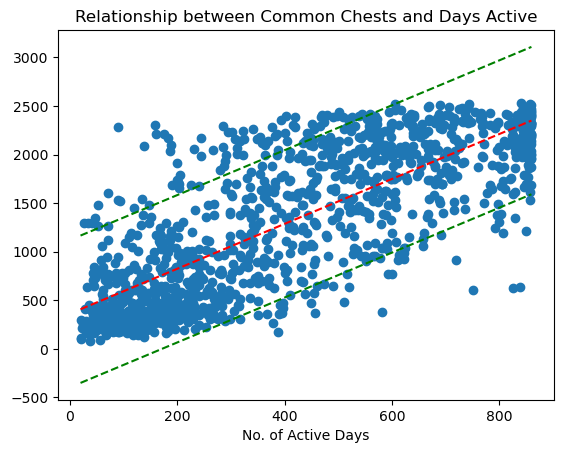

In [575]:
x = df.days_active.tolist()
y = df.common_chests.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.common_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.common_chests.tolist()),"g--")
plt.title("Relationship between Common Chests and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

                            OLS Regression Results                            
Dep. Variable:          common_chests   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     680.9
Date:                Fri, 03 Mar 2023   Prob (F-statistic):          2.49e-258
Time:                        21:58:50   Log-Likelihood:                -9086.2
No. Observations:                1203   AIC:                         1.818e+04
Df Residuals:                    1199   BIC:                         1.820e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.735e+06 

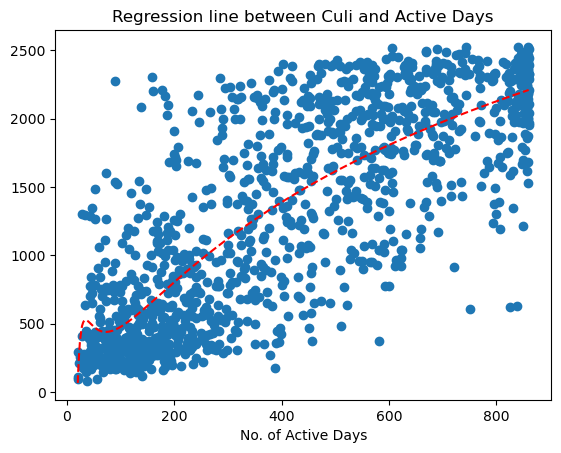

In [576]:
# df[['days_active','days_active^2','1/days_active','log(days_active)','sigmoid(days_active)']]
f = df.sort_values(by=['days_active'])
y_sm = df.common_chests
x_sm = df[['1/days_active','log(days_active)','sigmoid(days_active)']]
x_sm = sm.add_constant(x_sm)
model = sm.OLS(y_sm, x_sm)
results = model.fit()
ypred = results.predict(x_sm)
print(results.summary())

plt.scatter(df.days_active, y_sm, label='data')
plt.plot(x,ypred,"r--")
plt.title("Regression line between Culi and Active Days")
plt.xlabel("No. of Active Days")
plt.show()

In [577]:
asia_list = df[df['server'] == 'asia'].common_chests.tolist()
euro_list = df[df['server'] == 'euro'].common_chests.tolist()
usa_list = df[df['server'] == 'usa'].common_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 110 - 2526 mean: 1280.5764966740576
euro range: 81 - 2525 mean: 1378.0192837465565
usa  range: 92 - 2489 mean: 1237.7943444730076
0.0346636526746264 significant difference between server


In [578]:
df.exquisite_chests.describe()

count    1203.000000
mean      914.184539
std       459.664067
min        64.000000
25%       461.000000
50%       967.000000
75%      1350.000000
max      1588.000000
Name: exquisite_chests, dtype: float64

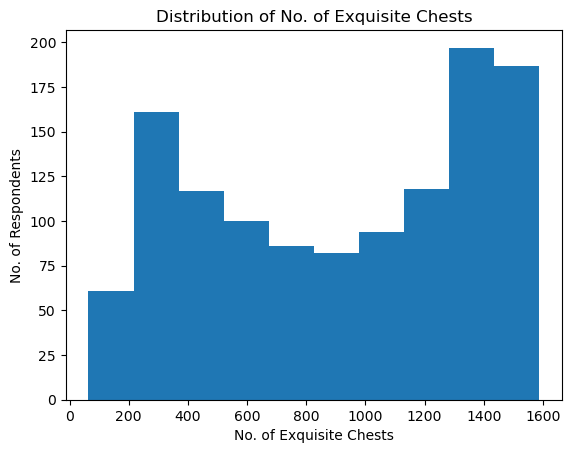

In [579]:
plt.hist(df.exquisite_chests, bins=10)
plt.xlabel("No. of Exquisite Chests")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Exquisite Chests")
plt.show()

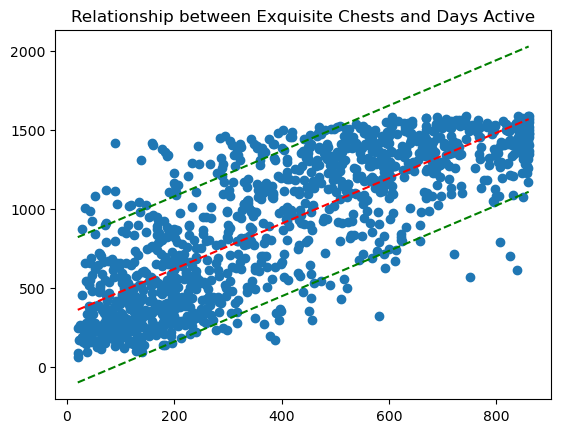

In [448]:
x = df.days_active.tolist()
y = df.exquisite_chests.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.exquisite_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.exquisite_chests.tolist()),"g--")
plt.title("Relationship between Exquisite Chests and Days Active")
plt.show()

In [449]:
df.precious_chests.describe()

count    1203.000000
mean      278.233583
std       135.178791
min        27.000000
25%       151.000000
50%       281.000000
75%       403.000000
max       486.000000
Name: precious_chests, dtype: float64

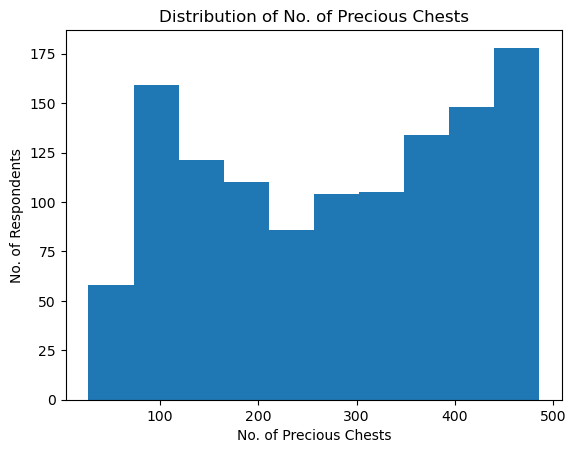

In [580]:
plt.hist(df.precious_chests, bins=10)
plt.xlabel("No. of Precious Chests")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Precious Chests")
plt.show()

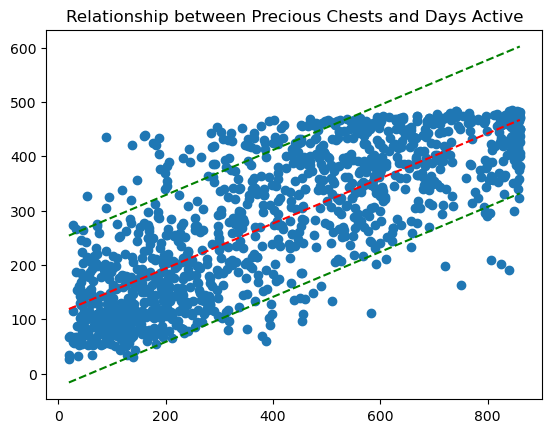

In [451]:
x = df.days_active.tolist()
y = df.precious_chests.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.precious_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.precious_chests.tolist()),"g--")
plt.title("Relationship between Precious Chests and Days Active")
plt.show()

In [452]:
asia_list = df[df['server'] == 'asia'].precious_chests.tolist()
euro_list = df[df['server'] == 'euro'].precious_chests.tolist()
usa_list = df[df['server'] == 'usa'].precious_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 34 - 486 mean: 279.1086474501109
euro range: 32 - 484 mean: 291.3801652892562
usa  range: 27 - 484 mean: 264.9511568123393
0.027084810460129387 significant difference between server


In [453]:
df.luxurious_chests.describe()

count    1203.000000
mean      109.562760
std        50.815594
min        10.000000
25%        63.000000
50%       114.000000
75%       158.000000
max       186.000000
Name: luxurious_chests, dtype: float64

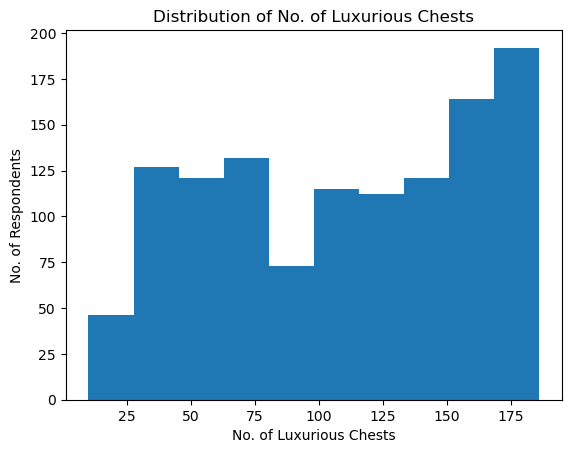

In [581]:
plt.hist(df.luxurious_chests, bins=10)
plt.xlabel("No. of Luxurious Chests")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Luxurious Chests")
plt.show()

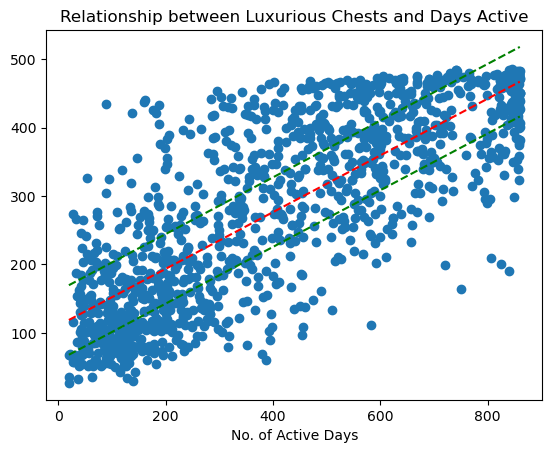

In [455]:
x = df.days_active.tolist()
y = df.precious_chests.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.luxurious_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.luxurious_chests.tolist()),"g--")
plt.title("Relationship between Luxurious Chests and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

In [456]:
asia_list = df[df['server'] == 'asia'].luxurious_chests.tolist()
euro_list = df[df['server'] == 'euro'].luxurious_chests.tolist()
usa_list = df[df['server'] == 'usa'].luxurious_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 15 - 185 mean: 109.71175166297118
euro range: 15 - 186 mean: 114.633608815427
usa  range: 10 - 184 mean: 104.65809768637533
0.026618587303324396 significant difference between server


In [457]:
df.remarkable_chests.describe()

count    1203.000000
mean       63.924356
std        51.936398
min         0.000000
25%        12.000000
50%        56.000000
75%       115.500000
max       146.000000
Name: remarkable_chests, dtype: float64

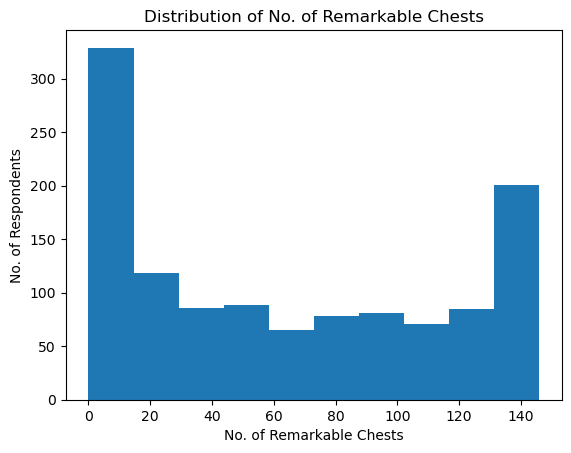

In [582]:
plt.hist(df.remarkable_chests, bins=10)
plt.xlabel("No. of Remarkable Chests")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Remarkable Chests")
plt.show()

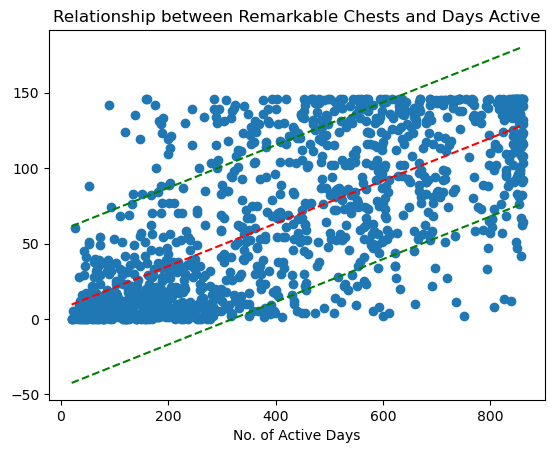

In [459]:
x = df.days_active.tolist()
y = df.remarkable_chests.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.remarkable_chests.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.remarkable_chests.tolist()),"g--")
plt.title("Relationship between Remarkable Chests and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

In [460]:
asia_list = df[df['server'] == 'asia'].remarkable_chests.tolist()
euro_list = df[df['server'] == 'euro'].remarkable_chests.tolist()
usa_list = df[df['server'] == 'usa'].remarkable_chests.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 146 mean: 62.97560975609756
euro range: 0 - 146 mean: 69.98898071625344
usa  range: 0 - 146 mean: 59.365038560411314
0.0173198071787413 significant difference between server


In [461]:
df.unlocked_waypoints.describe()

count    1203.000000
mean      246.875312
std        46.514622
min        71.000000
25%       224.000000
50%       265.000000
75%       286.000000
max       295.000000
Name: unlocked_waypoints, dtype: float64

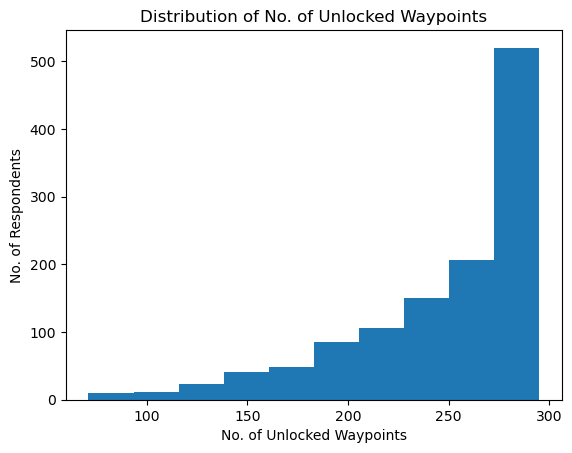

In [583]:
plt.hist(df.unlocked_waypoints, bins=10)
plt.xlabel("No. of Unlocked Waypoints")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Unlocked Waypoints")
plt.show()

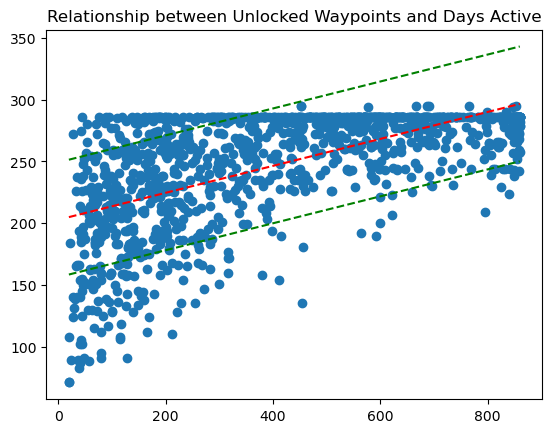

In [463]:
x = df.days_active.tolist()
y = df.unlocked_waypoints.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.unlocked_waypoints.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.unlocked_waypoints.tolist()),"g--")
plt.title("Relationship between Unlocked Waypoints and Days Active")
plt.show()

In [464]:
asia_list = df[df['server'] == 'asia'].unlocked_waypoints.tolist()
euro_list = df[df['server'] == 'euro'].unlocked_waypoints.tolist()
usa_list = df[df['server'] == 'usa'].unlocked_waypoints.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 71 - 295 mean: 246.9889135254989
euro range: 83 - 295 mean: 249.87052341597797
usa  range: 71 - 295 mean: 243.94858611825194
0.21798125499278467 no significant difference between server


In [465]:
df.unlocked_domains.describe()

count    1203.000000
mean       40.073150
std         7.971641
min        14.000000
25%        35.000000
50%        43.000000
75%        46.000000
max        49.000000
Name: unlocked_domains, dtype: float64

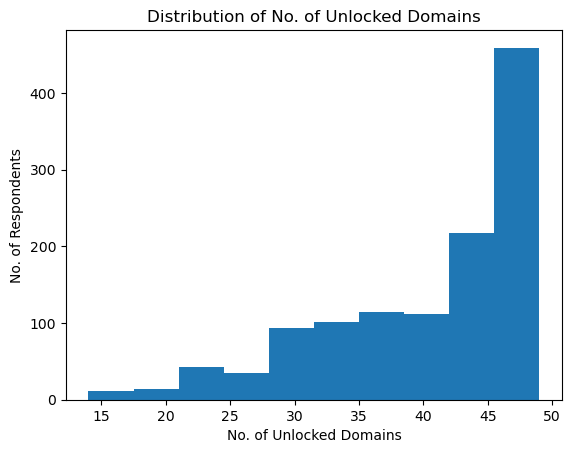

In [584]:
plt.hist(df.unlocked_domains, bins=10)
plt.xlabel("No. of Unlocked Domains")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Unlocked Domains")
plt.show()

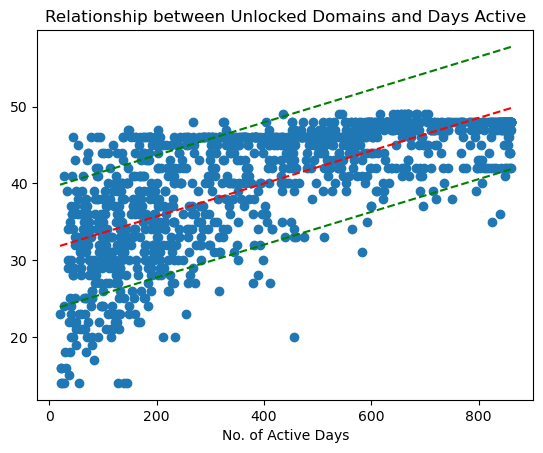

In [467]:
x = df.days_active.tolist()
y = df.unlocked_domains.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.unlocked_domains.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.unlocked_domains.tolist()),"g--")
plt.title("Relationship between Unlocked Domains and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

In [468]:
asia_list = df[df['server'] == 'asia'].unlocked_domains.tolist()
euro_list = df[df['server'] == 'euro'].unlocked_domains.tolist()
usa_list = df[df['server'] == 'usa'].unlocked_domains.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 14 - 49 mean: 40.25720620842572
euro range: 15 - 49 mean: 40.46831955922865
usa  range: 14 - 49 mean: 39.491002570694086
0.20129896511647624 no significant difference between server


<b>Serenitea Pot</b><br>
- Teapot Level
- Teapot Visitors
- Teapot Comfort
- Teapot Items
- Floating Abode
- Emerald Peak
- Cool Isle
- Silken Courtyard
- Sublime Spicewood

In [469]:
df.teapot_level.describe()

count    1203.000000
mean        7.501247
std         3.350162
min         1.000000
25%         4.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: teapot_level, dtype: float64

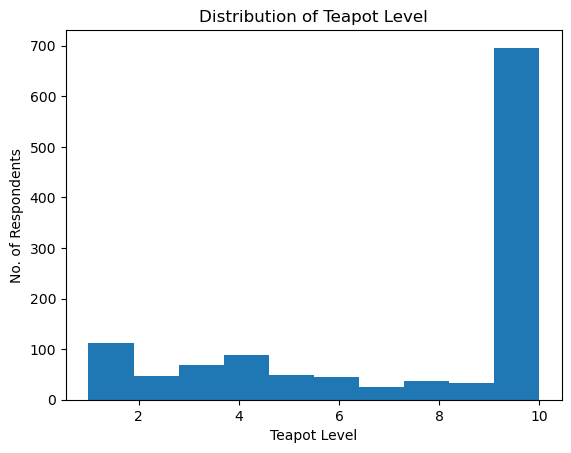

In [585]:
plt.hist(df.teapot_level, bins=10)
plt.xlabel("Teapot Level")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Teapot Level")
plt.show()

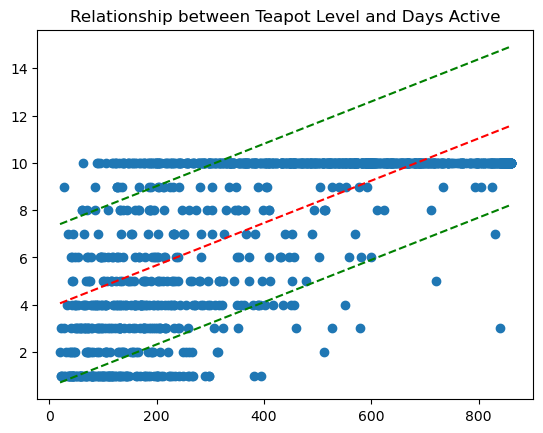

In [471]:
x = df.days_active.tolist()
y = df.teapot_level.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_level.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_level.tolist()),"g--")
plt.title("Relationship between Teapot Level and Days Active")
plt.show()

In [472]:
asia_list = df[df['server'] == 'asia'].teapot_level.tolist()
euro_list = df[df['server'] == 'euro'].teapot_level.tolist()
usa_list = df[df['server'] == 'usa'].teapot_level.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 1 - 10 mean: 7.450110864745011
euro range: 1 - 10 mean: 7.760330578512397
usa  range: 1 - 10 mean: 7.318766066838046
0.1800209622893098 no significant difference between server


In [473]:
df.teapot_visitors.describe()

count    1203.000000
mean       13.068994
std        21.193139
min         0.000000
25%         1.000000
50%         4.000000
75%        16.000000
max       188.000000
Name: teapot_visitors, dtype: float64

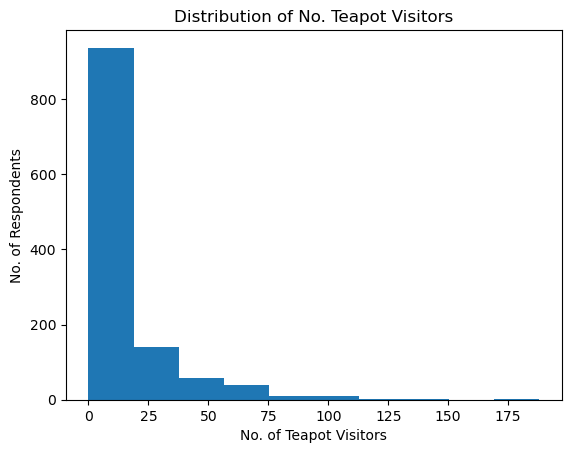

In [586]:
plt.hist(df.teapot_visitors, bins=10)
plt.xlabel("No. of Teapot Visitors")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. Teapot Visitors")
plt.show()

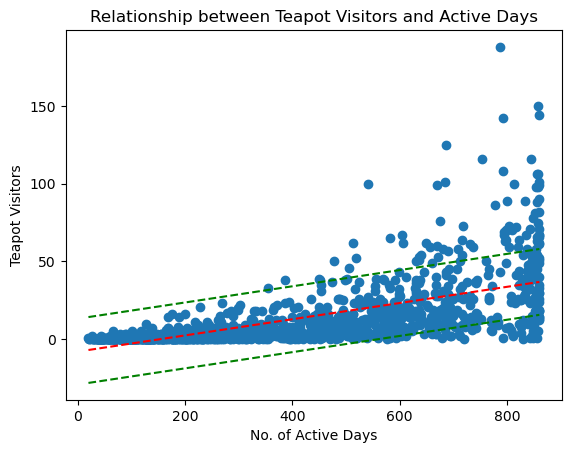

In [475]:
x = df.days_active.tolist()
y = df.teapot_visitors.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Teapot Visitors")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_visitors.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_visitors.tolist()),"g--")
plt.title("Relationship between Teapot Visitors and Active Days")
plt.show()

In [476]:
asia_list = df[df['server'] == 'asia'].teapot_visitors.tolist()
euro_list = df[df['server'] == 'euro'].teapot_visitors.tolist()
usa_list = df[df['server'] == 'usa'].teapot_visitors.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 188 mean: 15.361419068736142
euro range: 0 - 144 mean: 12.575757575757576
usa  range: 0 - 101 mean: 10.87146529562982
0.007911901956461687 significant difference between server


In [477]:
df.teapot_comfort.describe()

count     1203.000000
mean     15019.600998
std      10009.880011
min       1800.000000
25%       4925.000000
50%      15610.000000
75%      22150.000000
max      68240.000000
Name: teapot_comfort, dtype: float64

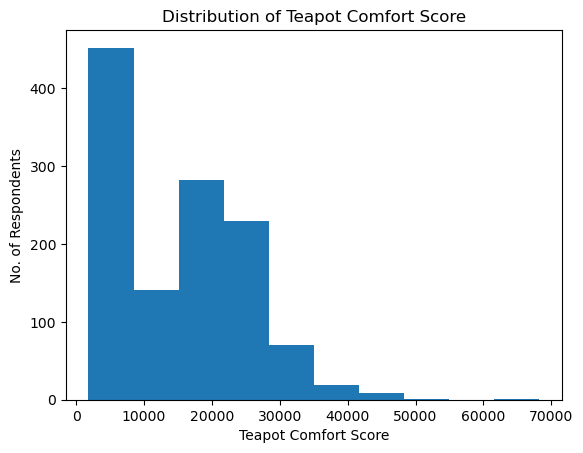

In [589]:
plt.hist(df.teapot_comfort, bins=10)
plt.xlabel("Teapot Comfort Score")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Teapot Comfort Score")
plt.show()

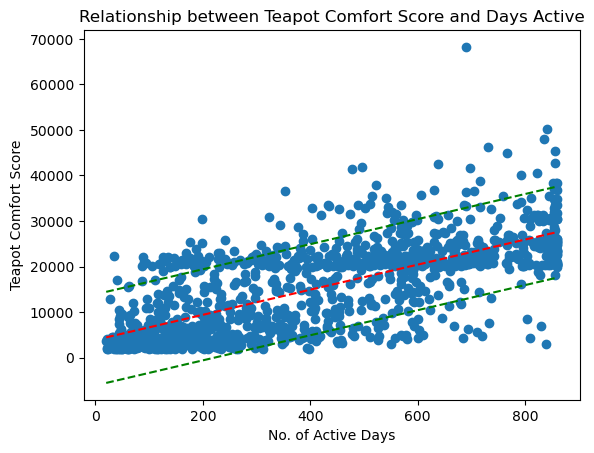

In [479]:
x = df.days_active.tolist()
y = df.teapot_comfort.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Teapot Comfort Score")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_comfort.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_comfort.tolist()),"g--")
plt.title("Relationship between Teapot Comfort Score and Days Active")
plt.show()

In [480]:
asia_list = df[df['server'] == 'asia'].teapot_comfort.tolist()
euro_list = df[df['server'] == 'euro'].teapot_comfort.tolist()
usa_list = df[df['server'] == 'usa'].teapot_comfort.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 1800 - 50190 mean: 15108.935698447893
euro range: 1800 - 68240 mean: 15739.69696969697
usa  range: 1800 - 48120 mean: 14244.061696658098
0.11943202570629988 no significant difference between server


In [481]:
df.teapot_items.describe()

count    1203.000000
mean      927.616791
std       908.733378
min         3.000000
25%       239.000000
50%       659.000000
75%      1354.000000
max      7172.000000
Name: teapot_items, dtype: float64

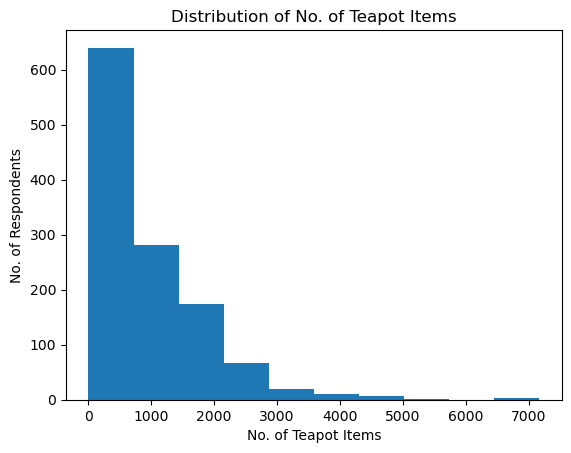

In [588]:
plt.hist(df.teapot_items, bins=10)
plt.xlabel("No. of Teapot Items")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Teapot Items")
plt.show()

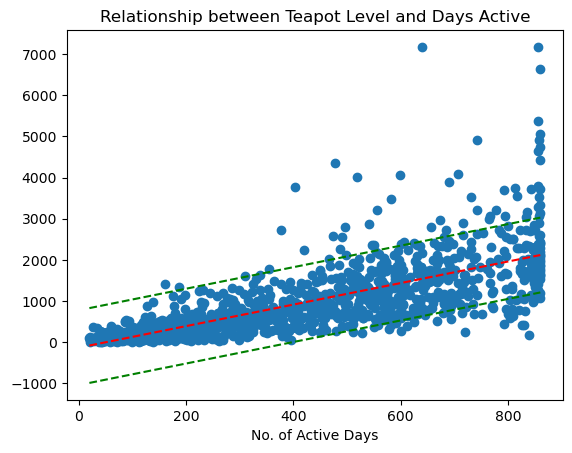

In [483]:
x = df.days_active.tolist()
y = df.teapot_items.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_items.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_items.tolist()),"g--")
plt.title("Relationship between Teapot Level and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

In [484]:
asia_list = df[df['server'] == 'asia'].teapot_items.tolist()
euro_list = df[df['server'] == 'euro'].teapot_items.tolist()
usa_list = df[df['server'] == 'usa'].teapot_items.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 15 - 4906 mean: 924.019955654102
euro range: 3 - 5063 mean: 979.5454545454545
usa  range: 14 - 7172 mean: 883.3290488431877
0.3473751463155243 no significant difference between server


In [485]:
df.teapot_realm.value_counts()

1    404
5    292
4    241
3    149
2    117
Name: teapot_realm, dtype: int64

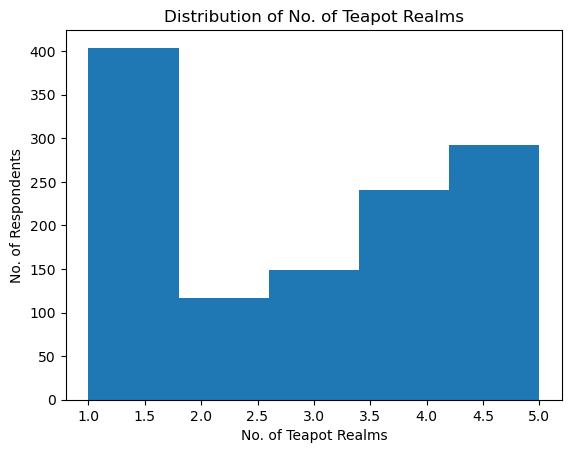

In [590]:
plt.hist(df.teapot_realm, bins=5)
plt.xlabel("No. of Teapot Realms")
plt.ylabel("No. of Respondents")
plt.title("Distribution of No. of Teapot Realms")
plt.show()

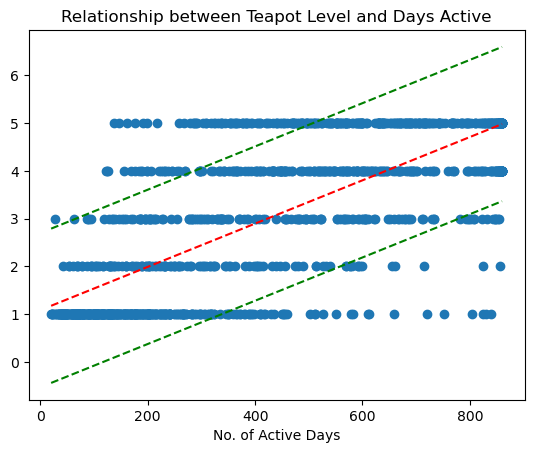

In [487]:
x = df.days_active.tolist()
y = df.teapot_realm.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.teapot_realm.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.teapot_realm.tolist()),"g--")
plt.title("Relationship between Teapot Level and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

In [488]:
asia_list = df[df['server'] == 'asia'].teapot_realm.tolist()
euro_list = df[df['server'] == 'euro'].teapot_realm.tolist()
usa_list = df[df['server'] == 'usa'].teapot_realm.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 1 - 5 mean: 2.8736141906873613
euro range: 1 - 5 mean: 3.0964187327823693
usa  range: 1 - 5 mean: 2.7994858611825193
0.03211951015052067 significant difference between server


<b>Spiral Abyss</b><br>

In [489]:
df.abyss_score1.describe()

count    1203.000000
mean       20.822111
std        13.899507
min         0.000000
25%         5.500000
50%        24.000000
75%        34.000000
max        36.000000
Name: abyss_score1, dtype: float64

In [490]:
df.abyss_score2.describe()

count    1203.000000
mean        4.182876
std         5.263582
min        -2.000000
25%         0.000000
50%         0.000000
75%        10.000000
max        12.000000
Name: abyss_score2, dtype: float64

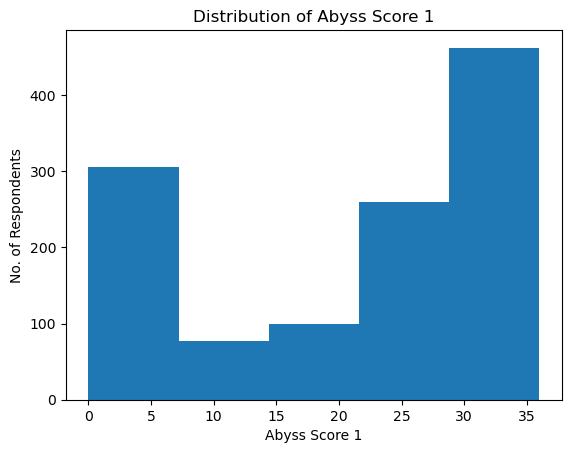

In [591]:
plt.hist(df.abyss_score1, bins=5)
plt.xlabel("Abyss Score 1")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Abyss Score 1")
plt.show()

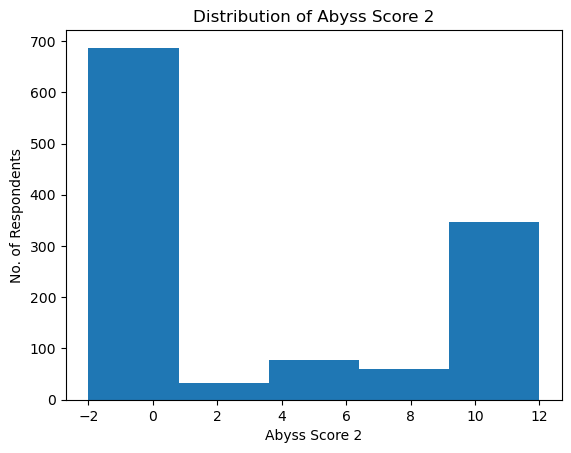

In [592]:
plt.hist(df.abyss_score2, bins=5)
plt.xlabel("Abyss Score 2")
plt.ylabel("No. of Respondents")
plt.title("Distribution of Abyss Score 2")
plt.show()

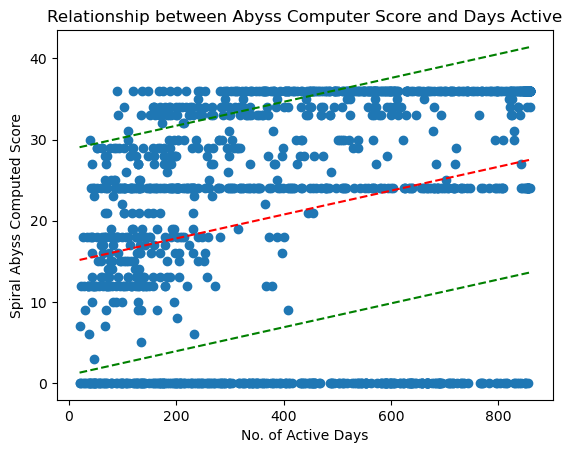

In [493]:
x = df.days_active.tolist()
y = df.abyss_score1.tolist()
plt.scatter(x, y)
plt.xlabel("No. of Active Days")
plt.ylabel("Spiral Abyss Computed Score")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.abyss_score1.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.abyss_score1.tolist()),"g--")
plt.title("Relationship between Abyss Computer Score and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

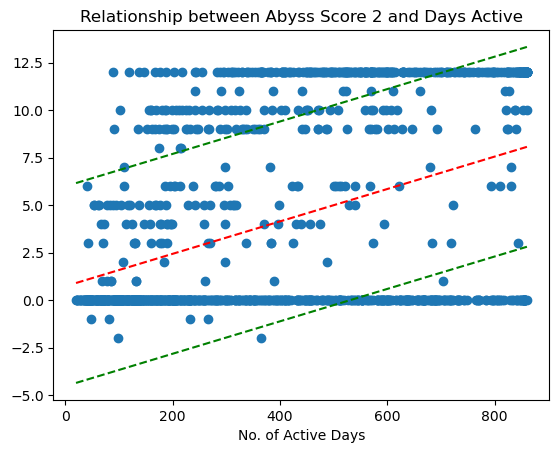

In [494]:
x = df.days_active.tolist()
y = df.abyss_score2.tolist()
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.plot(x,p(x)+np.std(df.abyss_score2.tolist()),"g--")
plt.plot(x,p(x)-np.std(df.abyss_score2.tolist()),"g--")
plt.title("Relationship between Abyss Score 2 and Days Active")
plt.xlabel("No. of Active Days")
plt.show()

In [495]:
asia_list = df[df['server'] == 'asia'].abyss_score1.tolist()
euro_list = df[df['server'] == 'euro'].abyss_score1.tolist()
usa_list = df[df['server'] == 'usa'].abyss_score1.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: 0 - 36 mean: 22.303769401330378
euro range: 0 - 36 mean: 19.52892561983471
usa  range: 0 - 36 mean: 20.311053984575835
0.012213353799909588 significant difference between server


In [496]:
asia_list = df[df['server'] == 'asia'].abyss_score2.tolist()
euro_list = df[df['server'] == 'euro'].abyss_score2.tolist()
usa_list = df[df['server'] == 'usa'].abyss_score2.tolist()
f, p = f_oneway(asia_list, euro_list, usa_list)

print('asia','range:',min(asia_list),'-',max(asia_list),'mean:',sum(asia_list)/len(asia_list))
print('euro','range:',min(euro_list),'-',max(euro_list),'mean:',sum(euro_list)/len(euro_list))
print('usa ','range:',min(usa_list),'-',max(usa_list),'mean:',sum(usa_list)/len(usa_list))

if p <= 0.05:
    print(p, 'significant difference between server')
else:
    print(p, 'no significant difference between server')

asia range: -2 - 12 mean: 4.6252771618625275
euro range: -2 - 12 mean: 3.961432506887052
usa  range: -1 - 12 mean: 3.8766066838046274
0.07623048706046072 no significant difference between server


In [497]:
df_cluster = df[['level','achievements','days_active','characters','culi',
                 'common_chests','exquisite_chests','precious_chests','luxurious_chests',
                 'remarkable_chests','unlocked_waypoints','unlocked_domains','teapot_realm',
                 'teapot_visitors','teapot_comfort','teapot_items',
                 'total_explored','abyss_score1','total_5_characters','total_5_constellation',
                 'total_5_weapon','total_5_refinement']]

<b>Modelling using Hierarchical Method</b><br>

In [498]:
Z = linkage(df_cluster, 'single')
c, coph_dists = cophenet(Z, pdist(df_cluster))
c

0.4376170212880057

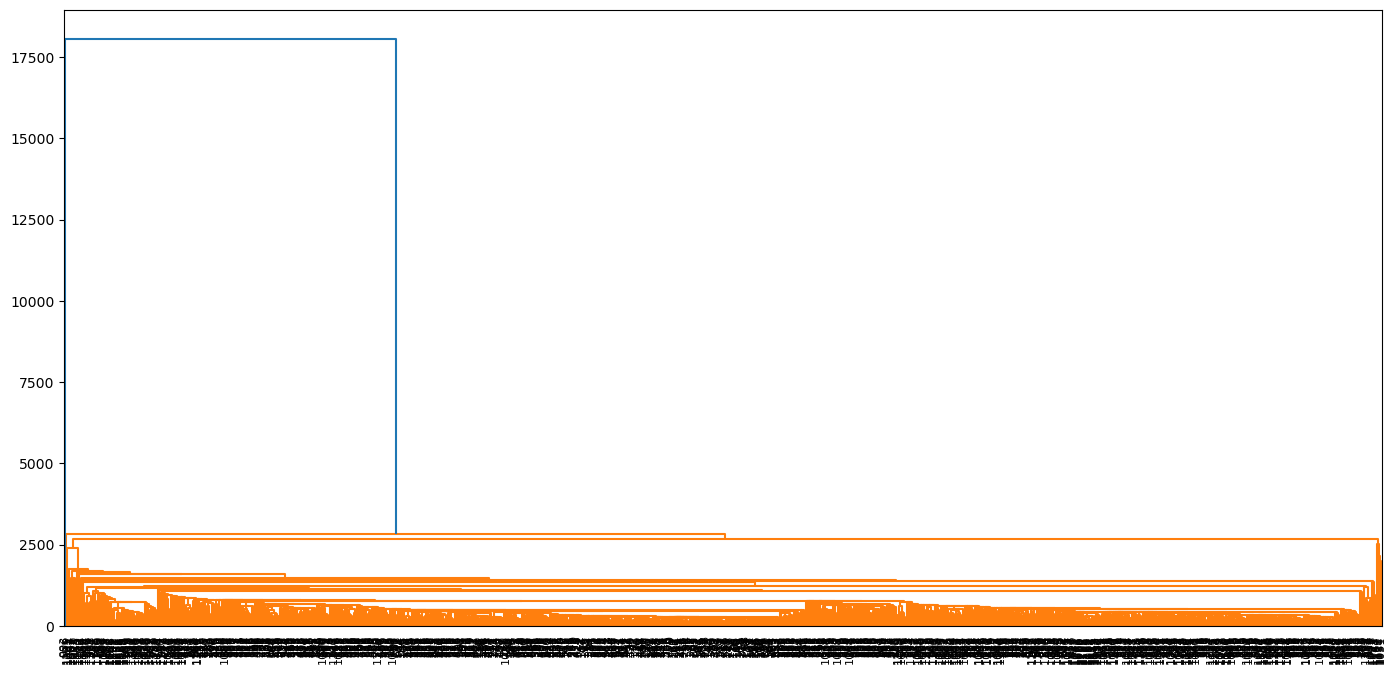

In [499]:
plt.figure(figsize=(17,8))
_ = dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

<b>Modelling using KMeans Method</b><br>

<b>KMeans Method</b>

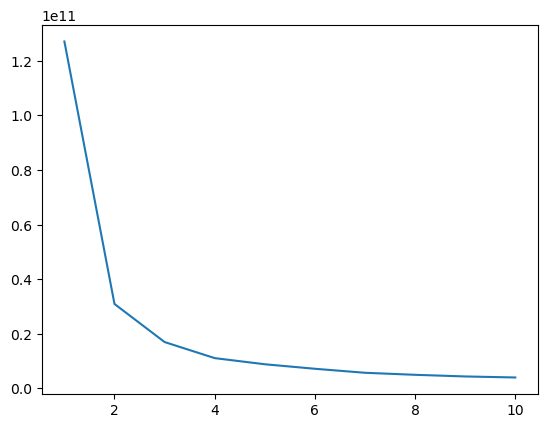

In [500]:
temp_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=4, random_state=0)
    kmeans.fit(df_cluster)
    temp_list.append(kmeans.inertia_)
plt.plot(range(1, 11), temp_list)
plt.show()

In [501]:
kmeans = KMeans(n_clusters=4, n_init=4, random_state=0)
kmeans.fit(df_cluster)
df_cluster['kmeans'] = kmeans.labels_
df_cluster.kmeans.value_counts()

1    462
3    448
0    191
2    102
Name: kmeans, dtype: int64

In [502]:
df_cluster.kmeans = df_cluster.kmeans.replace({0: 'Sophomore', 1: 'Junior', 2: 'Senior', 3: 'Freshman'})

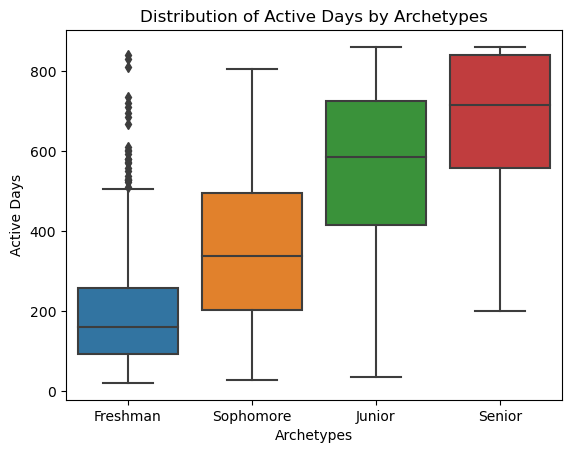

F-stats: 382.18 p-value: 0.0 significant difference between clusters


In [561]:
boxplot = sns.boxplot(x = df_cluster.kmeans, y = df_cluster.days_active)
boxplot.axes.set_title("Distribution of Active Days by Archetypes")
boxplot.set_xlabel("Archetypes")
boxplot.set_ylabel("Active Days")
plt.show()

d_data = {grp:df_cluster['days_active'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [508]:
df_cluster.groupby(['kmeans'])['days_active'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,200.830357,151.866752,20.0,91.75,159.5,258.25,839.0
Junior,462.0,562.188312,213.333935,34.0,414.00,586.0,725.75,860.0
Senior,102.0,686.274510,162.227450,199.0,556.75,716.0,840.25,860.0
Sophomore,191.0,350.738220,185.604941,27.0,203.00,337.0,495.00,804.0


F-stats: 187.8 p-value: 0.0 significant difference between clusters


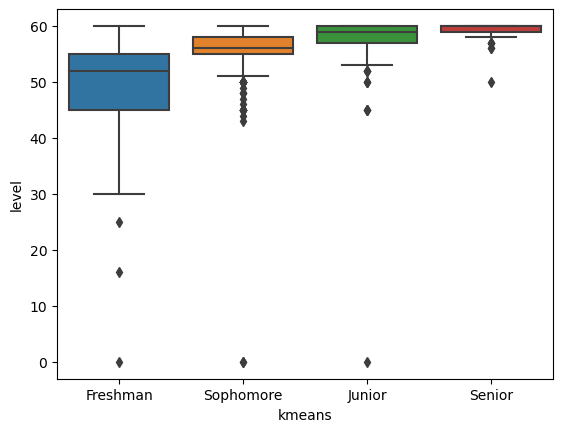

In [504]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.level)
grps = pd.unique(df_cluster.kmeans.values)
d_data = {grp:df_cluster['level'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [505]:
df_cluster.groupby(['kmeans'])['level'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,50.113839,7.080741,0.0,45.0,52.0,55.0,60.0
Junior,462.0,58.218615,3.439253,0.0,57.0,59.0,60.0,60.0
Senior,102.0,59.323529,1.336182,50.0,59.0,60.0,60.0,60.0
Sophomore,191.0,54.696335,6.812677,0.0,55.0,56.0,58.0,60.0


F-stats: 735.58 p-value: 0.0 significant difference between clusters


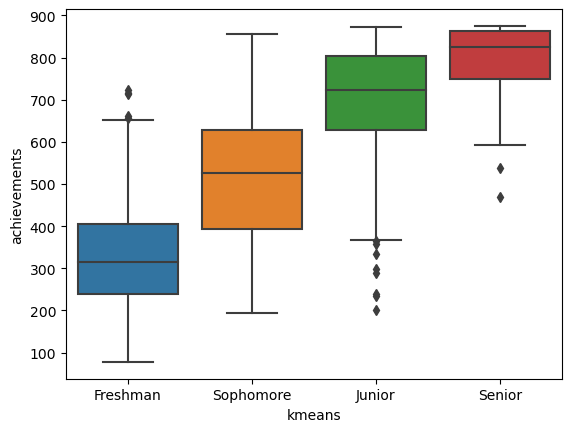

In [506]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.achievements)
d_data = {grp:df_cluster['achievements'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [507]:
df_cluster.groupby(['kmeans'])['achievements'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,337.267857,125.427233,78.0,240.00,316.0,406.0,723.0
Junior,462.0,699.798701,132.373545,200.0,628.25,723.0,803.0,872.0
Senior,102.0,791.833333,87.844607,470.0,749.50,824.0,862.0,875.0
Sophomore,191.0,512.109948,147.167693,194.0,394.00,527.0,628.0,857.0


F-stats: 331.39 p-value: 0.0 significant difference between clusters


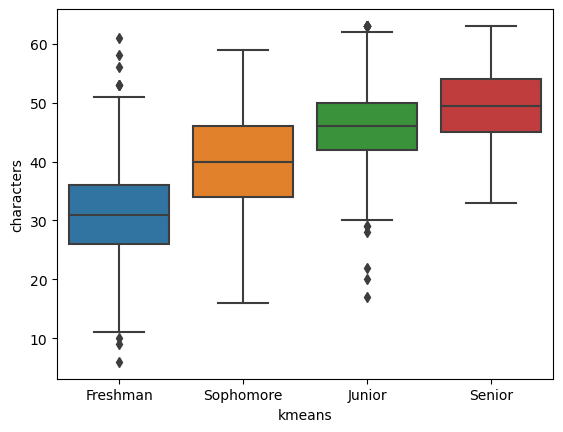

In [509]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.characters)
d_data = {grp:df_cluster['characters'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [533]:
df_cluster.groupby(['kmeans'])['characters'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,31.200893,8.224468,6.0,26.0,31.0,36.0,61.0
Junior,462.0,46.192641,7.286789,17.0,42.0,46.0,50.0,63.0
Senior,102.0,49.431373,6.455499,33.0,45.0,49.5,54.0,63.0
Sophomore,191.0,39.167539,8.974419,16.0,34.0,40.0,46.0,59.0


F-stats: 458.96 p-value: 0.0 significant difference between clusters


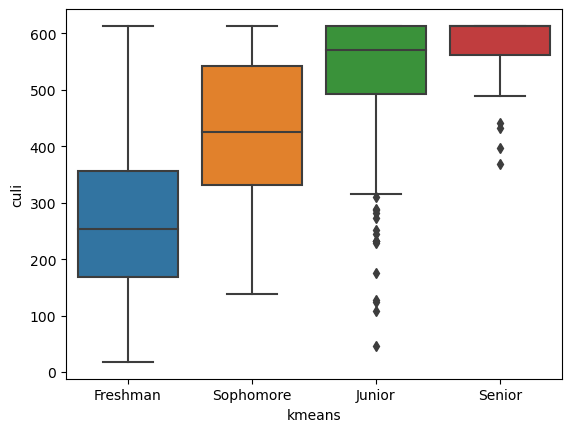

In [531]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.culi)
d_data = {grp:df_cluster['culi'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [ ]:
df_cluster.groupby(['kmeans'])['characters'].describe()

In [532]:
df_cluster.groupby(['kmeans'])['culi'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,270.997768,135.286828,18.0,167.75,253.0,355.25,612.0
Junior,462.0,534.692641,100.468602,46.0,492.25,571.0,613.00,613.0
Senior,102.0,582.578431,49.498762,369.0,562.00,613.0,613.00,613.0
Sophomore,191.0,424.371728,130.038509,138.0,332.00,425.0,541.50,613.0


F-stats: 664.67 p-value: 0.0 significant difference between clusters


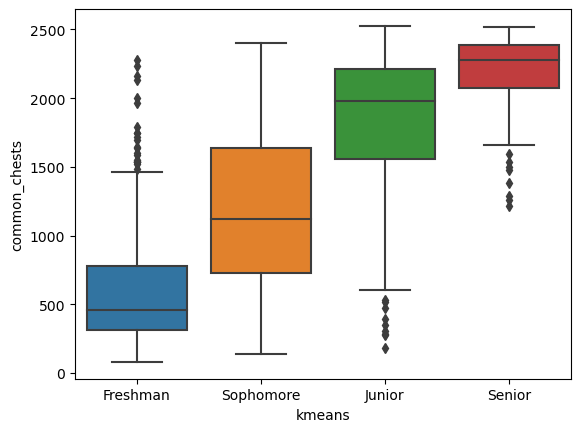

In [511]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.common_chests)
d_data = {grp:df_cluster['common_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [534]:
df_cluster.groupby(['kmeans'])['common_chests'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,597.310268,405.924751,81.0,313.0,455.5,776.00,2278.0
Junior,462.0,1829.774892,507.180370,183.0,1555.0,1978.0,2212.75,2526.0
Senior,102.0,2176.294118,297.626871,1219.0,2073.5,2281.5,2384.75,2521.0
Sophomore,191.0,1174.502618,555.789139,141.0,731.5,1122.0,1637.50,2404.0


F-stats: 671.82 p-value: 0.0 significant difference between clusters


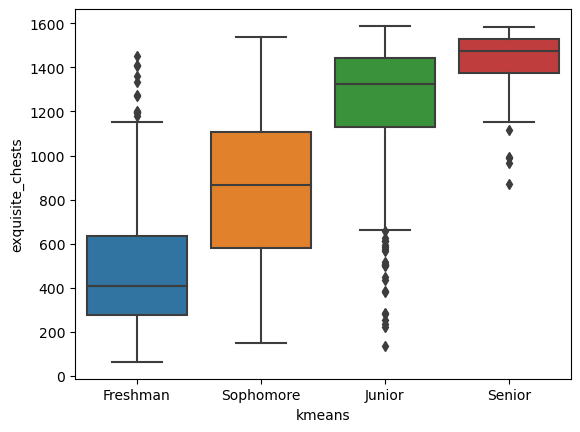

In [512]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.exquisite_chests)
d_data = {grp:df_cluster['exquisite_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [535]:
df_cluster.groupby(['kmeans'])['exquisite_chests'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,486.098214,276.901495,64.0,279.00,408.5,636.5,1452.0
Junior,462.0,1242.701299,281.178704,137.0,1128.75,1324.0,1441.0,1588.0
Senior,102.0,1424.137255,146.424923,873.0,1375.25,1472.0,1527.0,1583.0
Sophomore,191.0,851.319372,339.080549,151.0,581.50,867.0,1107.5,1539.0


F-stats: 655.52 p-value: 0.0 significant difference between clusters


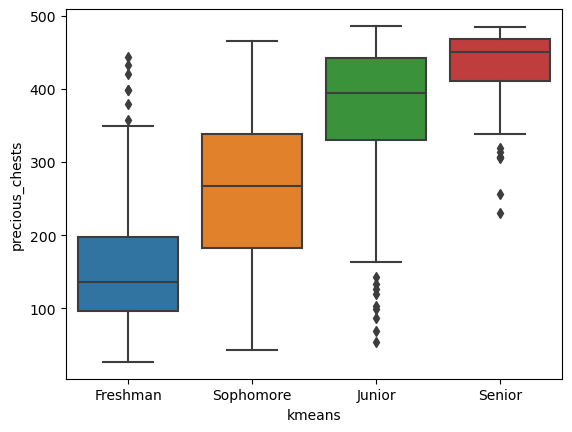

In [513]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.precious_chests)
d_data = {grp:df_cluster['precious_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [536]:
df_cluster.groupby(['kmeans'])['precious_chests'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,153.584821,78.311470,27.0,97.00,135.5,198.25,443.0
Junior,462.0,374.257576,85.879555,54.0,330.00,394.0,442.00,486.0
Senior,102.0,429.754902,53.274079,231.0,411.25,450.0,467.75,484.0
Sophomore,191.0,257.418848,99.772438,43.0,182.50,268.0,338.50,465.0


F-stats: 630.08 p-value: 0.0 significant difference between clusters


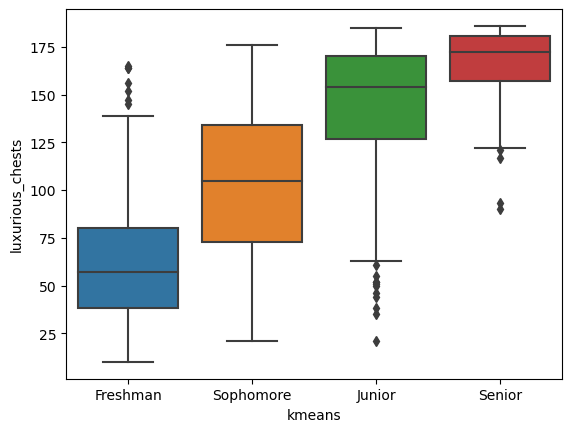

In [514]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.luxurious_chests)
d_data = {grp:df_cluster['luxurious_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [537]:
df_cluster.groupby(['kmeans'])['luxurious_chests'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,62.729911,31.112710,10.0,38.00,57.0,80.00,165.0
Junior,462.0,145.370130,31.568392,21.0,127.00,154.0,170.00,185.0
Senior,102.0,165.235294,20.139698,90.0,157.25,172.5,180.75,186.0
Sophomore,191.0,103.068063,37.807693,21.0,73.00,105.0,134.00,176.0


F-stats: 535.66 p-value: 0.0 significant difference between clusters


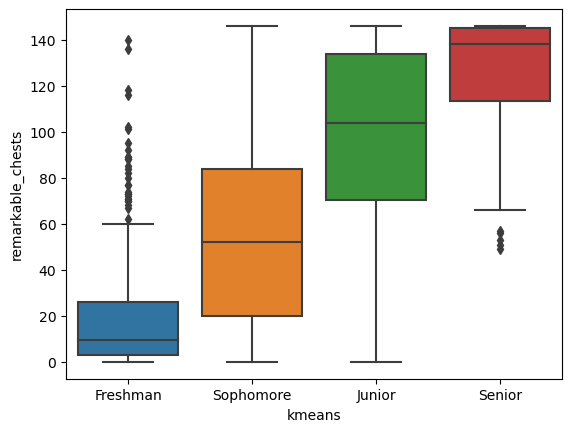

In [515]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.remarkable_chests)
d_data = {grp:df_cluster['remarkable_chests'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [538]:
df_cluster.groupby(['kmeans'])['remarkable_chests'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,18.462054,23.425037,0.0,3.00,9.5,26.25,140.0
Junior,462.0,98.212121,40.330016,0.0,70.50,104.0,134.00,146.0
Senior,102.0,124.441176,26.469700,49.0,113.25,138.0,145.00,146.0
Sophomore,191.0,55.303665,41.010806,0.0,20.00,52.0,84.00,146.0


F-stats: 228.99 p-value: 0.0 significant difference between clusters


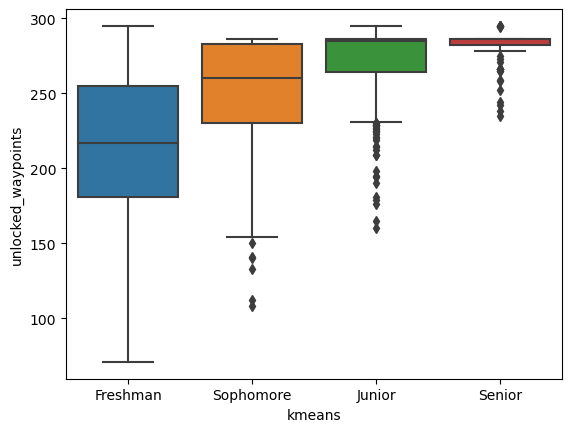

In [516]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.unlocked_waypoints)
d_data = {grp:df_cluster['unlocked_waypoints'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [539]:
df_cluster.groupby(['kmeans'])['unlocked_waypoints'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,212.207589,50.050259,71.0,180.75,217.0,255.0,295.0
Junior,462.0,271.824675,22.190987,160.0,264.00,285.0,286.0,295.0
Senior,102.0,281.166667,11.412242,235.0,282.00,286.0,286.0,295.0
Sophomore,191.0,249.528796,39.299497,108.0,230.50,260.0,283.0,286.0


F-stats: 331.36 p-value: 0.0 significant difference between clusters


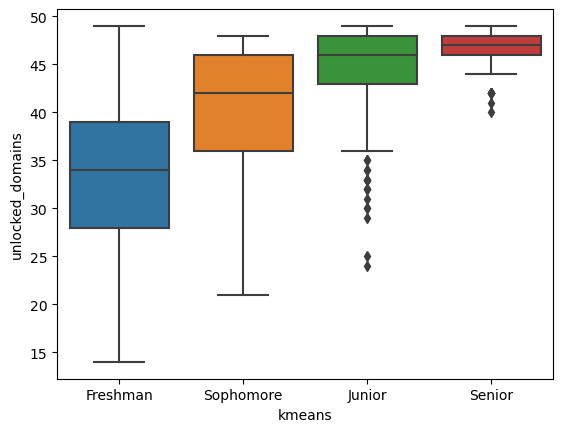

In [517]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.unlocked_domains)
d_data = {grp:df_cluster['unlocked_domains'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [540]:
df_cluster.groupby(['kmeans'])['unlocked_domains'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,33.466518,7.811753,14.0,28.0,34.0,39.0,49.0
Junior,462.0,44.839827,3.846329,24.0,43.0,46.0,48.0,49.0
Senior,102.0,46.745098,1.875777,40.0,46.0,47.0,48.0,49.0
Sophomore,191.0,40.476440,6.201716,21.0,36.0,42.0,46.0,48.0


F-stats: 750.98 p-value: 0.0 significant difference between clusters


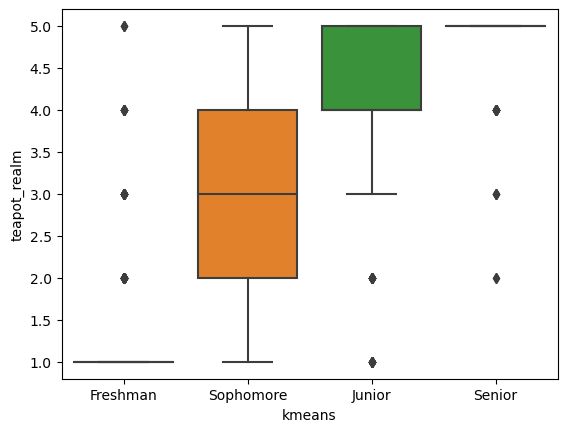

In [518]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_realm)
d_data = {grp:df_cluster['teapot_realm'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [541]:
df_cluster.groupby(['kmeans'])['teapot_realm'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,1.337054,0.750995,1.0,1.0,1.0,1.0,5.0
Junior,462.0,4.067100,0.997741,1.0,4.0,4.0,5.0,5.0
Senior,102.0,4.676471,0.647337,2.0,5.0,5.0,5.0,5.0
Sophomore,191.0,2.900524,1.328057,1.0,2.0,3.0,4.0,5.0


F-stats: 214.73 p-value: 0.0 significant difference between clusters


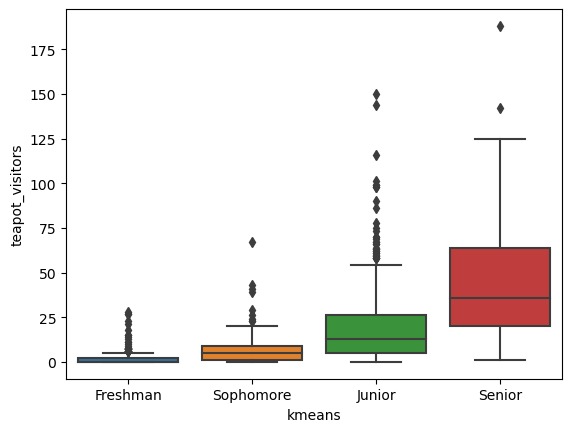

In [519]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_visitors)
d_data = {grp:df_cluster['teapot_visitors'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [542]:
df_cluster.groupby(['kmeans'])['teapot_visitors'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,1.584821,3.457242,0.0,0.00,0.0,2.0,28.0
Junior,462.0,19.935065,21.492270,0.0,5.25,13.0,26.0,150.0
Senior,102.0,44.382353,34.380240,1.0,20.00,35.5,63.5,188.0
Sophomore,191.0,6.675393,8.436099,0.0,1.00,5.0,9.0,67.0


F-stats: 5317.51 p-value: 0.0 significant difference between clusters


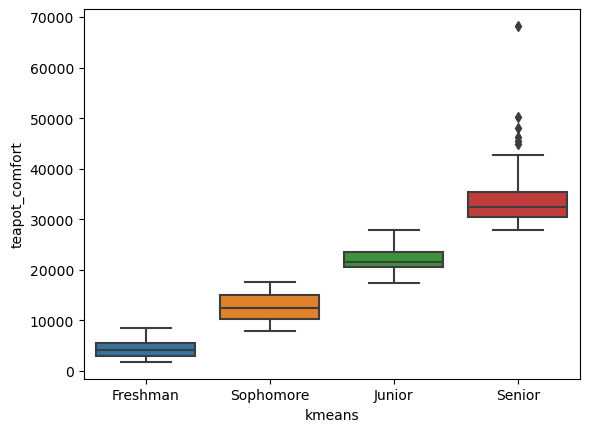

In [520]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_comfort)
d_data = {grp:df_cluster['teapot_comfort'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [544]:
df_cluster.groupby(['kmeans'])['teapot_comfort'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,4365.223214,1725.275958,1800.0,2940.0,4140.0,5630.0,8550.0
Junior,462.0,22136.536797,2233.643104,17450.0,20500.0,21650.0,23510.0,27980.0
Senior,102.0,33989.019608,5774.187956,27950.0,30432.5,32490.0,35425.0,68240.0
Sophomore,191.0,12664.921466,2735.101051,7880.0,10210.0,12500.0,14990.0,17690.0


F-stats: 630.43 p-value: 0.0 significant difference between clusters


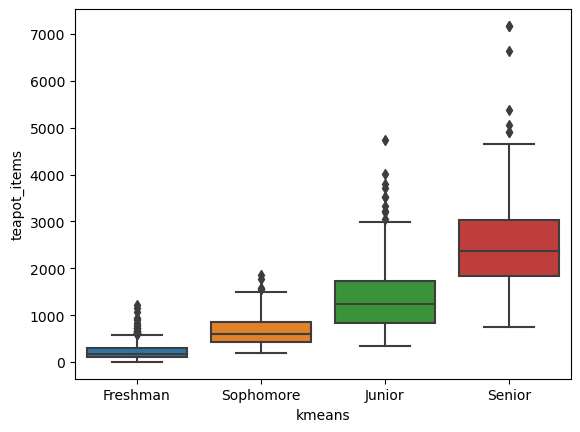

In [547]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.teapot_items)
d_data = {grp:df_cluster['teapot_items'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [548]:
df_cluster.groupby(['kmeans'])['teapot_items'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,225.241071,185.516788,3.0,98.5,174.5,293.00,1226.0
Junior,462.0,1344.093074,662.573892,338.0,841.0,1233.5,1721.00,4735.0
Senior,102.0,2622.274510,1210.850132,743.0,1832.5,2360.0,3026.25,7172.0
Sophomore,191.0,662.680628,318.514773,199.0,422.0,595.0,862.00,1849.0


F-stats: 593.11 p-value: 0.0 significant difference between clusters


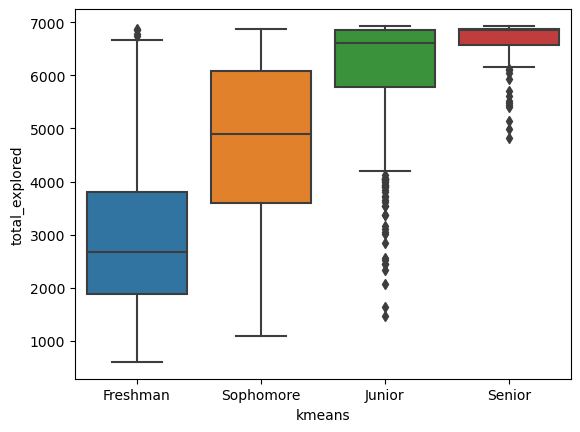

In [522]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_explored)
d_data = {grp:df_cluster['total_explored'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [549]:
df_cluster.groupby(['kmeans'])['total_explored'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,2941.073661,1353.027047,607.0,1890.00,2677.5,3812.0,6870.0
Junior,462.0,6110.709957,1060.600635,1476.0,5781.25,6610.0,6850.0,6930.0
Senior,102.0,6632.617647,460.881743,4819.0,6577.00,6850.0,6880.0,6930.0
Sophomore,191.0,4710.654450,1538.489196,1099.0,3595.50,4896.0,6080.5,6870.0


F-stats: 44.03 p-value: 0.0 significant difference between clusters


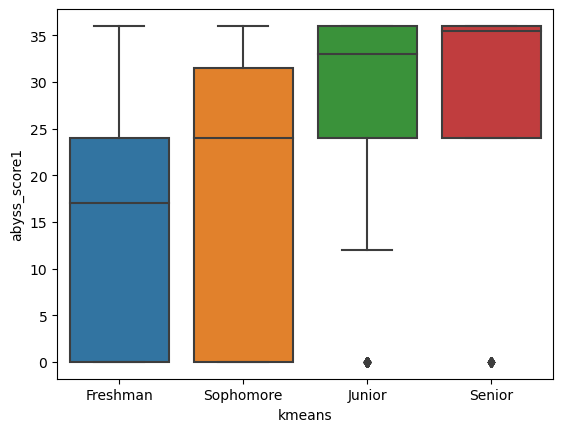

In [523]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.abyss_score1)
d_data = {grp:df_cluster['abyss_score1'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [550]:
df_cluster.groupby(['kmeans'])['abyss_score1'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,15.631696,11.526279,0.0,0.0,17.0,24.0,36.0
Junior,462.0,24.989177,14.321756,0.0,24.0,33.0,36.0,36.0
Senior,102.0,26.107843,14.065552,0.0,24.0,35.5,36.0,36.0
Sophomore,191.0,20.094241,13.621636,0.0,0.0,24.0,31.5,36.0


F-stats: 255.69 p-value: 0.0 significant difference between clusters


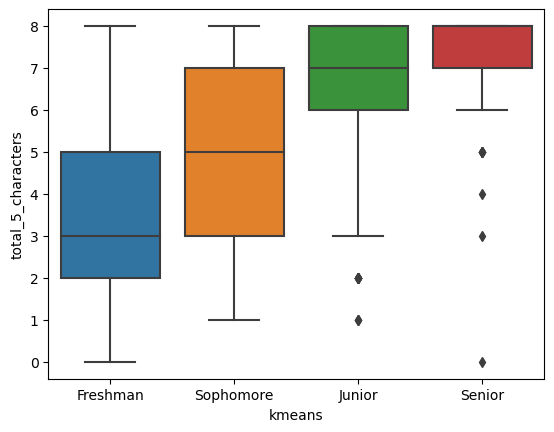

In [524]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_characters)
d_data = {grp:df_cluster['total_5_characters'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [551]:
df_cluster.groupby(['kmeans'])['total_5_characters'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,3.598214,1.909401,0.0,2.0,3.0,5.0,8.0
Junior,462.0,6.688312,1.639478,1.0,6.0,7.0,8.0,8.0
Senior,102.0,7.176471,1.261869,0.0,7.0,8.0,8.0,8.0
Sophomore,191.0,5.157068,2.242283,1.0,3.0,5.0,7.0,8.0


F-stats: 57.43 p-value: 0.0 significant difference between clusters


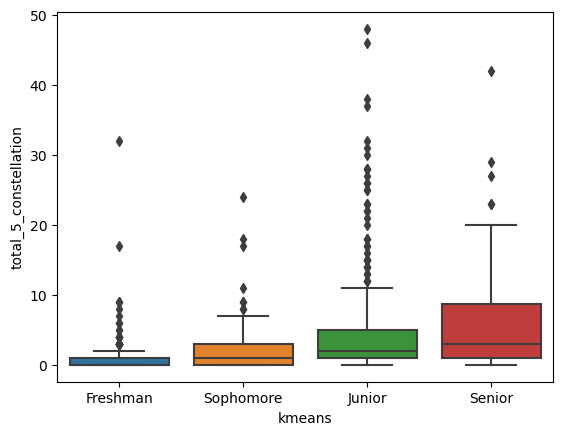

In [525]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_constellation)
d_data = {grp:df_cluster['total_5_constellation'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [553]:
df_cluster.groupby(['kmeans'])['total_5_constellation'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,0.765625,2.074879,0.0,0.0,0.0,1.00,32.0
Junior,462.0,4.365801,6.559122,0.0,1.0,2.0,5.00,48.0
Senior,102.0,5.931373,7.279783,0.0,1.0,3.0,8.75,42.0
Sophomore,191.0,1.874346,3.047850,0.0,0.0,1.0,3.00,24.0


F-stats: 146.79 p-value: 0.0 significant difference between clusters


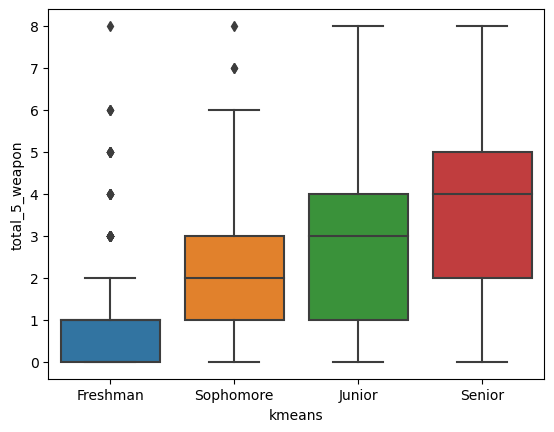

In [526]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_weapon)
d_data = {grp:df_cluster['total_5_weapon'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [554]:
df_cluster.groupby(['kmeans'])['total_5_weapon'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,0.950893,1.188046,0.0,0.0,1.0,1.0,8.0
Junior,462.0,2.893939,1.956026,0.0,1.0,3.0,4.0,8.0
Senior,102.0,3.892157,1.871659,0.0,2.0,4.0,5.0,8.0
Sophomore,191.0,2.005236,1.702931,0.0,1.0,2.0,3.0,8.0


F-stats: 86.46 p-value: 0.0 significant difference between clusters


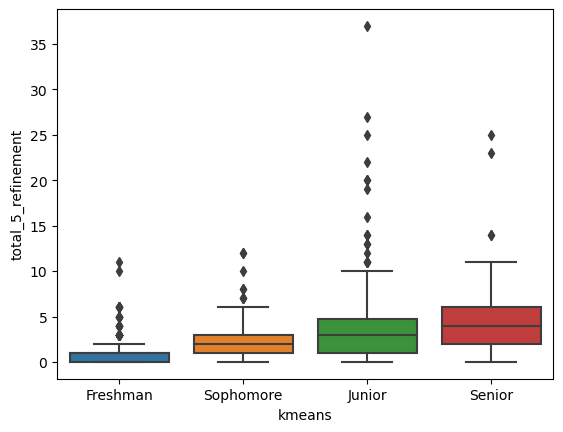

In [527]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.total_5_refinement)
d_data = {grp:df_cluster['total_5_refinement'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

In [555]:
df_cluster.groupby(['kmeans'])['total_5_refinement'].describe()

,count,mean,std,min,25%,50%,75%,max
kmeans,,,,,,,,
Freshman,448.0,1.000000,1.361010,0.0,0.0,1.0,1.00,11.0
Junior,462.0,3.545455,3.717971,0.0,1.0,3.0,4.75,37.0
Senior,102.0,4.774510,3.817383,0.0,2.0,4.0,6.00,25.0
Sophomore,191.0,2.188482,2.109146,0.0,1.0,2.0,3.00,12.0


In [556]:
sns.boxplot(x = df_cluster.kmeans, y = df_cluster.abyss_score2)
d_data = {grp:df_cluster['abyss_score2'][df_cluster.kmeans == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Sophomore'], d_data['Junior'], d_data['Senior'], d_data['Freshman'])
if p <= 0.05:
    print('F-stats:', round(F,2), 'p-value:', round(p,2), 'significant difference between clusters')
else:
    print('F-stats:', round(F,2), 'p-value:', round(p,2),  'no significant difference between clusters')

AttributeError: 'DataFrame' object has no attribute 'abyss_score2'